In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzA0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks, argrelextrema
from scipy.stats import pearsonr



# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

# Set Seaborn theme
sns.set_theme(style = "whitegrid")

In [3]:
#| echo: false
hfi = pd.read_csv("data/hfi.csv")
esi = pd.read_csv("data/esi.csv")

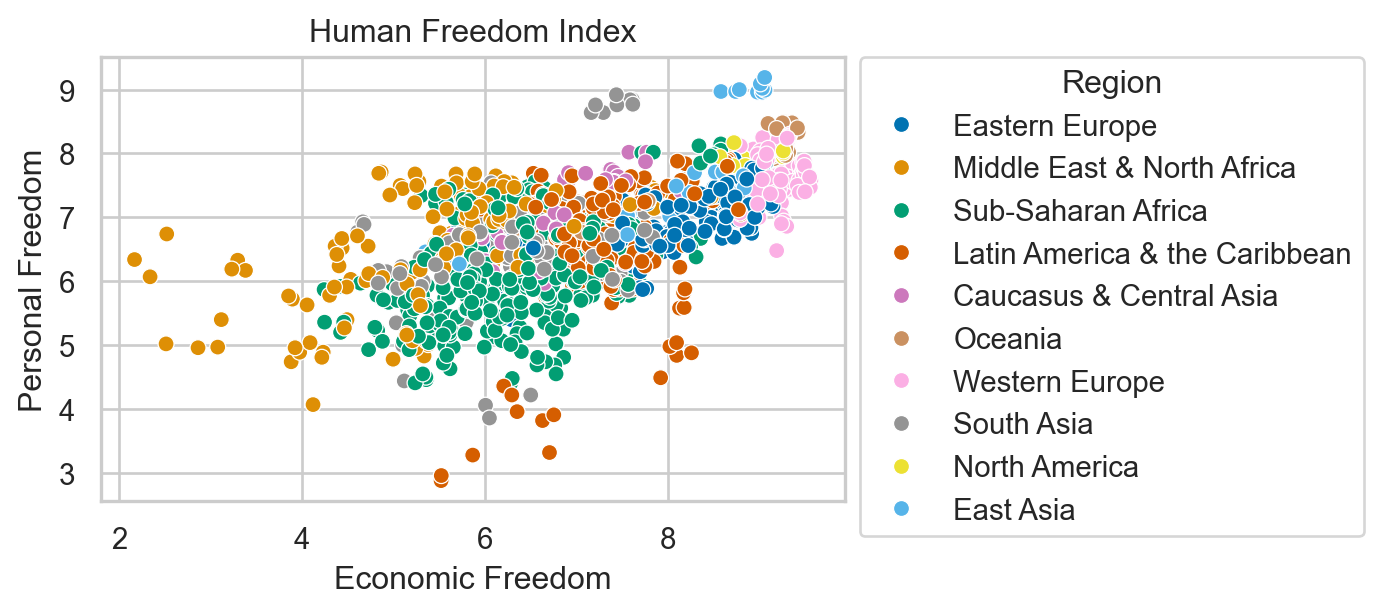

In [4]:
#| echo: false
plt.figure(figsize = (5, 3))
ax = sns.scatterplot(data = hfi, x = "pf_score", y = "ef_score",
                hue = "region", palette = "colorblind")
ax.legend(title = "Region",
          bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
ax.set(xlabel = "Economic Freedom")
ax.set(ylabel = "Personal Freedom")
ax.set(title = "Human Freedom Index")
plt.show()

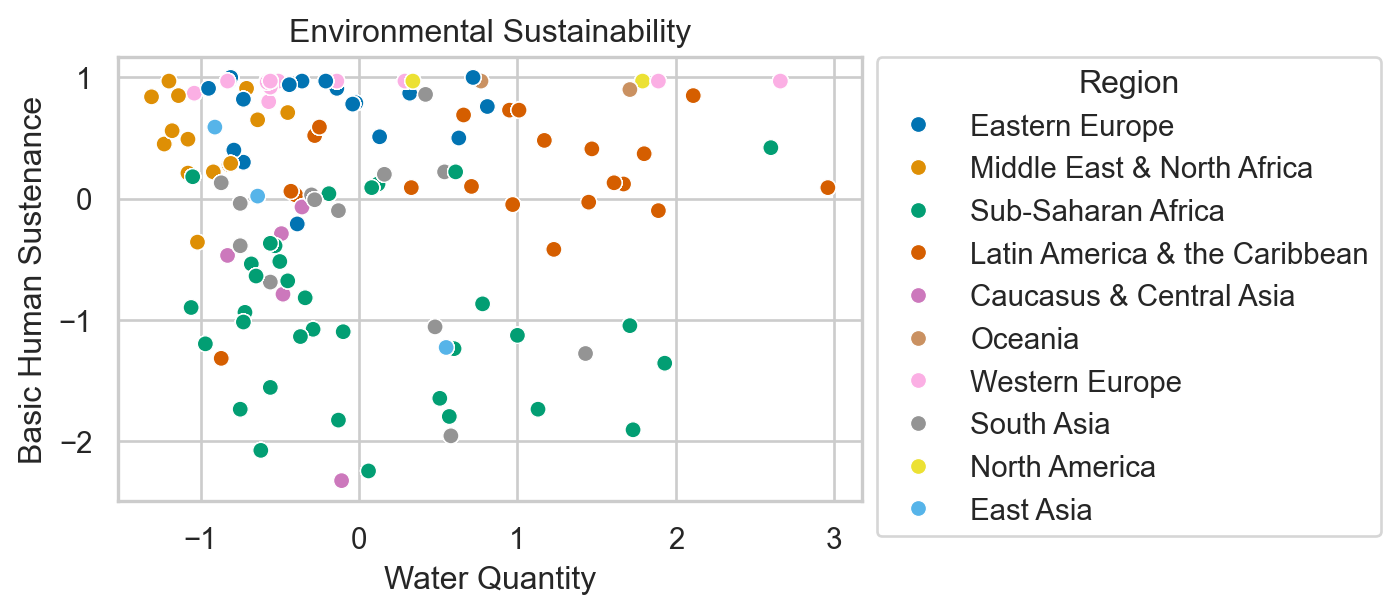

In [5]:
#| echo: false
hfi['country'] = hfi['countries']
data = esi.merge(hfi, how = 'left', on = 'country')

plt.figure(figsize = (5, 3))
ax = sns.scatterplot(data = data, x = "sys_wqn", y = "vul_sus",
                hue = "region", palette = "colorblind")
ax.legend(title = "Region",
          bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
ax.set(xlabel = "Water Quantity")
ax.set(ylabel = "Basic Human Sustenance")
ax.set(title = "Environmental Sustainability")
plt.show()

In [6]:
hfi = pd.read_csv("data/hfi.csv")
hfi.head()

year ISO_code  countries                         region  pf_rol_procedural  \
0  2016      ALB    Albania                 Eastern Europe           6.661503   
1  2016      DZA    Algeria     Middle East & North Africa                NaN   
2  2016      AGO     Angola             Sub-Saharan Africa                NaN   
3  2016      ARG  Argentina  Latin America & the Caribbean           7.098483   
4  2016      ARM    Armenia        Caucasus & Central Asia                NaN   

   pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  \
0      4.547244         4.666508  5.291752        8.920429   
1           NaN              NaN  3.819566        9.456254   
2           NaN              NaN  3.451814        8.060260   
3      5.791960         4.343930  5.744791        7.622974   
4           NaN              NaN  5.003205        8.808750   

   pf_ss_disappearances_disap  ...  ef_regulation_business_bribes  \
0                        10.0  ...                       4.050196   
1                        10.0  ...                       3.765515   
2                         5.0  ...                       1.945540   
3                        10.0  ...                       3.260044   
4                        10.0  ...                       4.575152   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                          7.324582                           7.074366   
1                          8.523503                           7.029528   
2                          8.096776                           6.782923   
3                          5.253411                           6.508295   
4                          9.319612                           6.491481   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  hf_score  \
0                6.705863       6.906901      7.54     34.0  7.568140   
1                5.676956       5.268992      4.99    159.0  5.135886   
2                4.930271       5.518500      5.17    155.0  5.640662   
3                5.535831       5.369019      4.84    160.0  6.469848   
4                6.797530       7.378069      7.57     29.0  7.241402   

   hf_rank  hf_quartile  
0     48.0          2.0  
1    155.0          4.0  
2    142.0          4.0  
3    107.0          3.0  
4     57.0          2.0  

[5 rows x 123 columns]

In [7]:
hfi.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 123 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    year                                int64  
 1    ISO_code                            object 
 2    countries                           object 
 3    region                              object 
 4    pf_rol_procedural                   float64
 5    pf_rol_civil                        float64
 6    pf_rol_criminal                     float64
 7    pf_rol                              float64
 8    pf_ss_homicide                      float64
 9    pf_ss_disappearances_disap          float64
 10   pf_ss_disappearances_violent        float64
 11   pf_ss_disappearances_organized      float64
 12   pf_ss_disappearances_fatalities     float64
 13   pf_ss_disappearances_injuries       float64
 14   pf_ss_disappearances                float64
 15   pf_ss_women_fgm                     

In [8]:
hfi.describe()

year  pf_rol_procedural  pf_rol_civil  pf_rol_criminal  \
count  1458.000000         880.000000    880.000000       880.000000   
mean   2012.000000           5.589355      5.474770         5.044070   
std       2.582875           2.080957      1.428494         1.724886   
min    2008.000000           0.000000      0.000000         0.000000   
25%    2010.000000           4.133333      4.549550         3.789724   
50%    2012.000000           5.300000      5.300000         4.575189   
75%    2014.000000           7.389499      6.410975         6.400000   
max    2016.000000           9.700000      8.773533         8.719848   

            pf_rol  pf_ss_homicide  pf_ss_disappearances_disap  \
count  1378.000000     1378.000000                 1369.000000   
mean      5.309641        7.412980                    8.341855   
std       1.529310        2.832947                    3.225902   
min       0.000000        0.000000                    0.000000   
25%       4.131746        6.386978                   10.000000   
50%       4.910797        8.638278                   10.000000   
75%       6.513178        9.454402                   10.000000   
max       8.723094        9.926568                   10.000000   

       pf_ss_disappearances_violent  pf_ss_disappearances_organized  \
count                   1378.000000                     1279.000000   
mean                       9.519458                        6.772869   
std                        1.744673                        2.768983   
min                        0.000000                        0.000000   
25%                       10.000000                        5.000000   
50%                       10.000000                        7.500000   
75%                       10.000000                       10.000000   
max                       10.000000                       10.000000   

       pf_ss_disappearances_fatalities  ...  ef_regulation_business_bribes  \
count                      1378.000000  ...                    1283.000000   
mean                          9.584972  ...                       4.886192   
std                           1.559826  ...                       1.889168   
min                           0.000000  ...                       0.000000   
25%                           9.942607  ...                       3.433786   
50%                          10.000000  ...                       4.418371   
75%                          10.000000  ...                       6.227978   
max                          10.000000  ...                       9.623811   

       ef_regulation_business_licensing  ef_regulation_business_compliance  \
count                       1357.000000                        1368.000000   
mean                           7.698494                           6.981858   
std                            1.728507                           1.979200   
min                            0.000000                           0.000000   
25%                            6.874687                           6.368178   
50%                            8.074161                           7.466692   
75%                            8.991882                           8.209310   
max                            9.999638                           9.865488   

       ef_regulation_business  ef_regulation     ef_score      ef_rank  \
count             1374.000000    1378.000000  1378.000000  1378.000000   
mean                 6.317668       7.019782     6.785610    76.973149   
std                  1.230988       1.027625     0.883601    44.540142   
min                  2.009841       2.483540     2.880000     1.000000   
25%                  5.591851       6.429498     6.250000    38.000000   
50%                  6.265234       7.082075     6.900000    77.000000   
75%                  7.139718       7.720955     7.410000   115.000000   
max                  9.272600       9.439828     9.190000   162.000000   

          hf_score      hf_rank  hf_quartile  
count  137

In [9]:
hfi.isna().sum()

year                   0
ISO_code               0
countries              0
region                 0
pf_rol_procedural    578
                    ... 
ef_score              80
ef_rank               80
hf_score              80
hf_rank               80
hf_quartile           80
Length: 123, dtype: int64

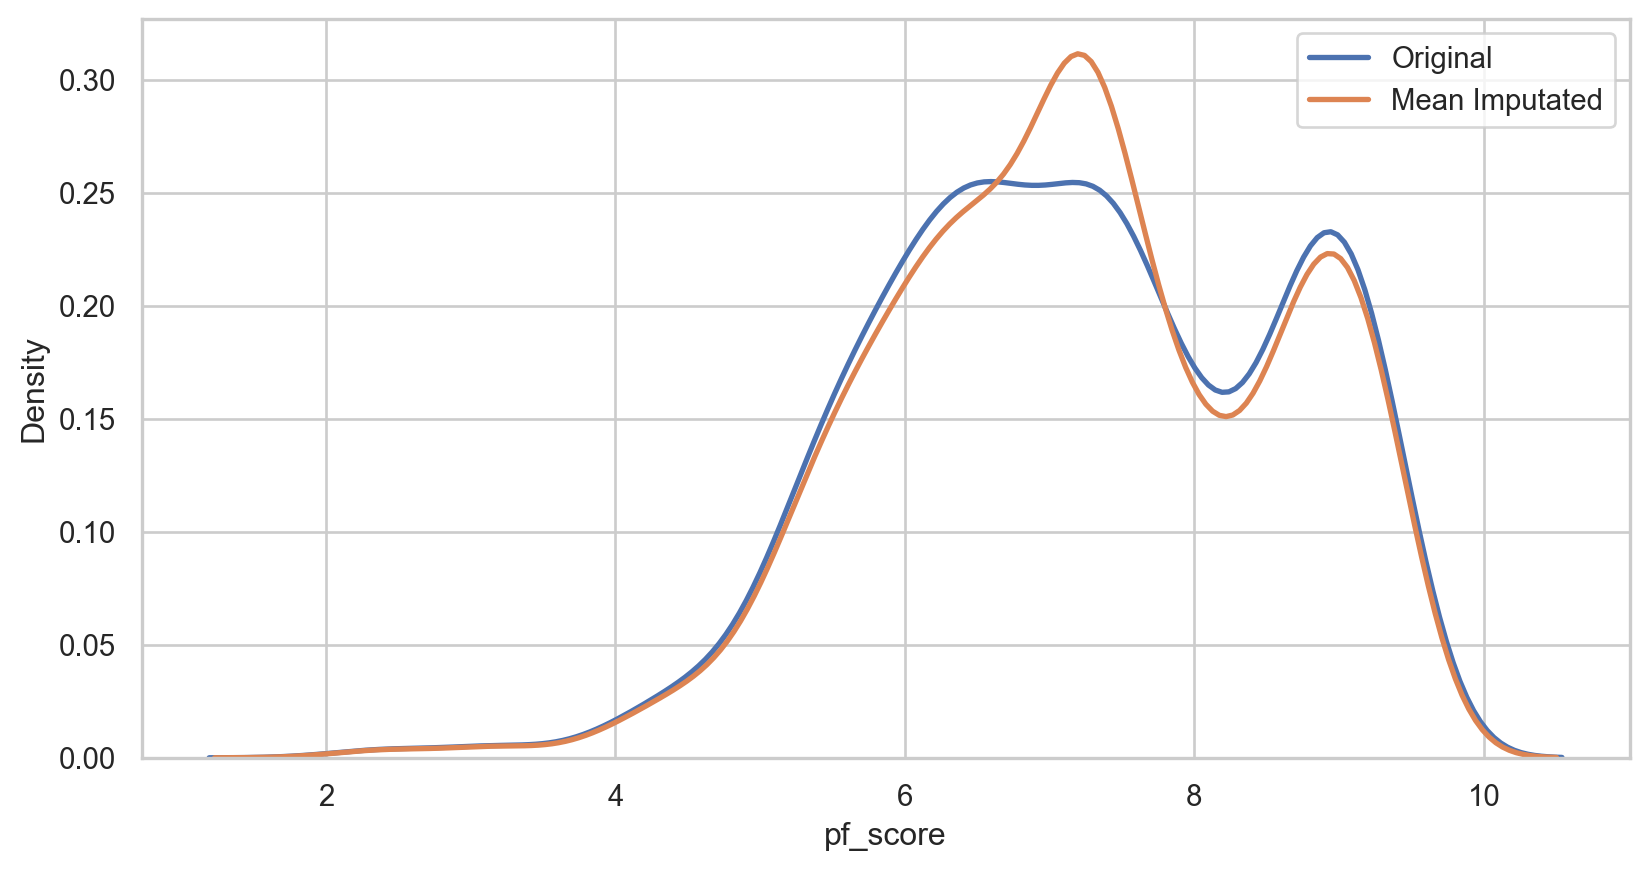

In [10]:
#| echo: false

hfi_copy = hfi

mean_imputer = SimpleImputer(strategy = 'mean')
hfi_copy['mean_pf_score'] = mean_imputer.fit_transform(hfi_copy[['pf_score']])

mean_plot = sns.kdeplot(data = hfi_copy, x = 'pf_score', linewidth = 2, label = "Original")

mean_plot = sns.kdeplot(data = hfi_copy, x = 'mean_pf_score', linewidth = 2, label = "Mean Imputated")

plt.legend()

plt.show()

In [11]:
#| eval: false
#| code-line-numbers: 1-12|1|3,4|6,8,10,12
hfi_copy = hfi

mean_imputer = SimpleImputer(strategy = 'mean')
hfi_copy['mean_pf_score'] = mean_imputer.fit_transform(hfi_copy[['pf_score']])

mean_plot = sns.kdeplot(data = hfi_copy, x = 'pf_score', linewidth = 2, label = "Original")

mean_plot = sns.kdeplot(data = hfi_copy, x = 'mean_pf_score', linewidth = 2, label = "Mean Imputated")

plt.legend()

plt.show()

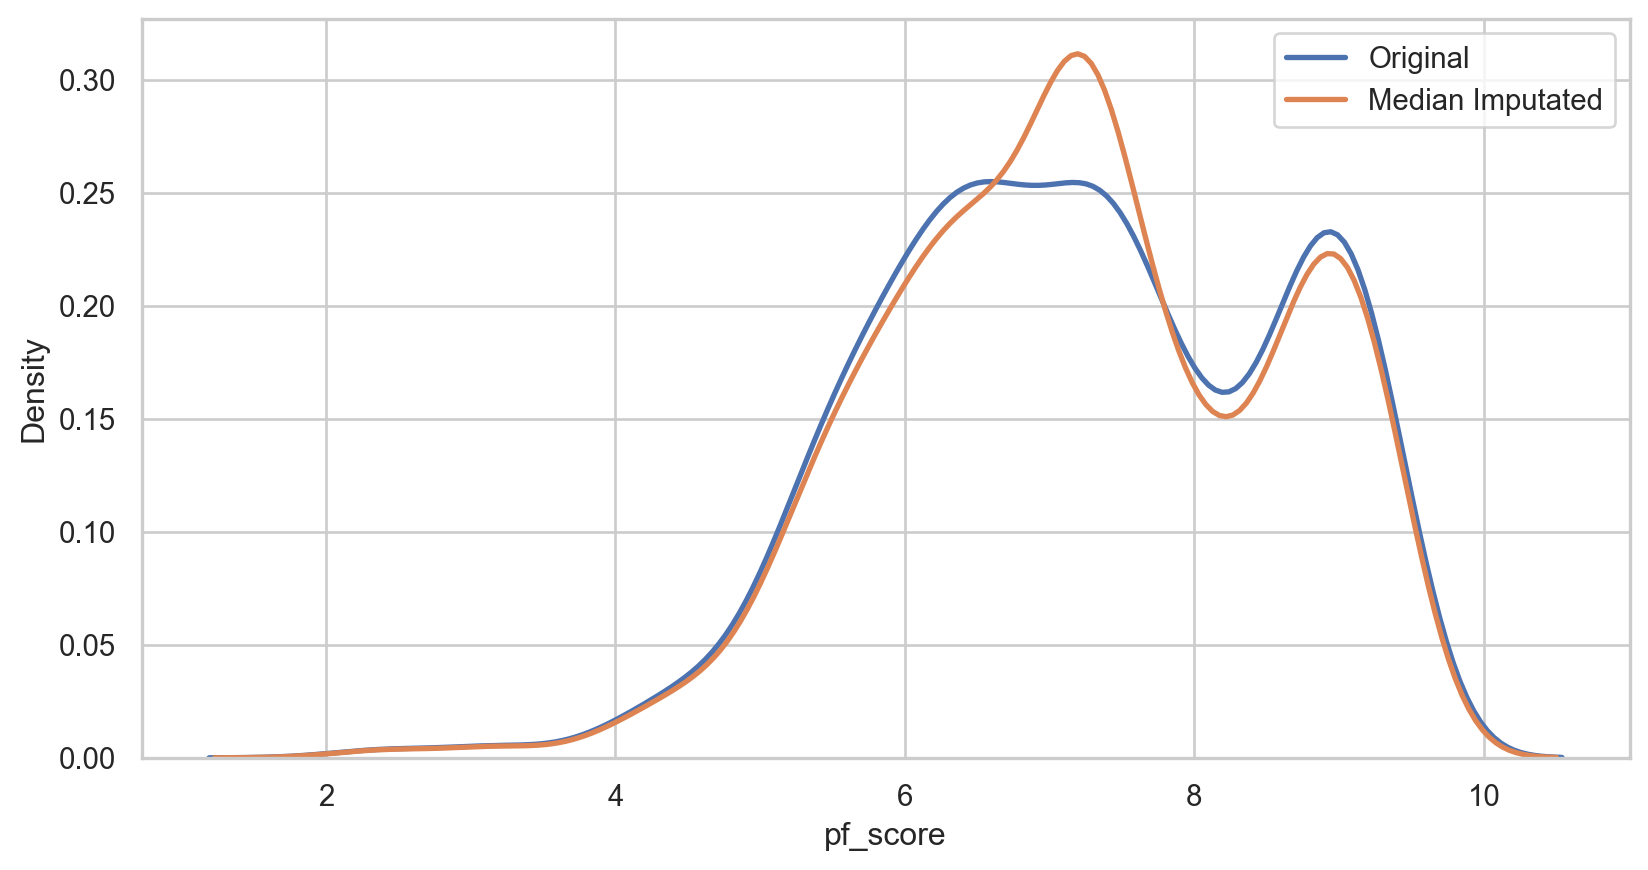

In [12]:
#| echo: false

median_imputer = SimpleImputer(strategy = 'median')
hfi_copy['median_pf_score'] = median_imputer.fit_transform(hfi_copy[['pf_score']])

mean_plot = sns.kdeplot(data = hfi_copy, x = 'pf_score', linewidth = 2, label = "Original")

mean_plot = sns.kdeplot(data = hfi_copy, x = 'median_pf_score', linewidth = 2, label = "Median Imputated")

plt.legend()

plt.show()

In [13]:
#| eval: false
#| code-line-numbers: 1-10|1,2

median_imputer = SimpleImputer(strategy = 'median')
hfi_copy['median_pf_score'] = median_imputer.fit_transform(hfi_copy[['pf_score']])

median_plot = sns.kdeplot(data = hfi_copy, x = 'pf_score', linewidth = 2, label = "Original")

median_plot = sns.kdeplot(data = hfi_copy, x = 'median_pf_score', linewidth = 2, label = "Median Imputated")

plt.legend()

plt.show()

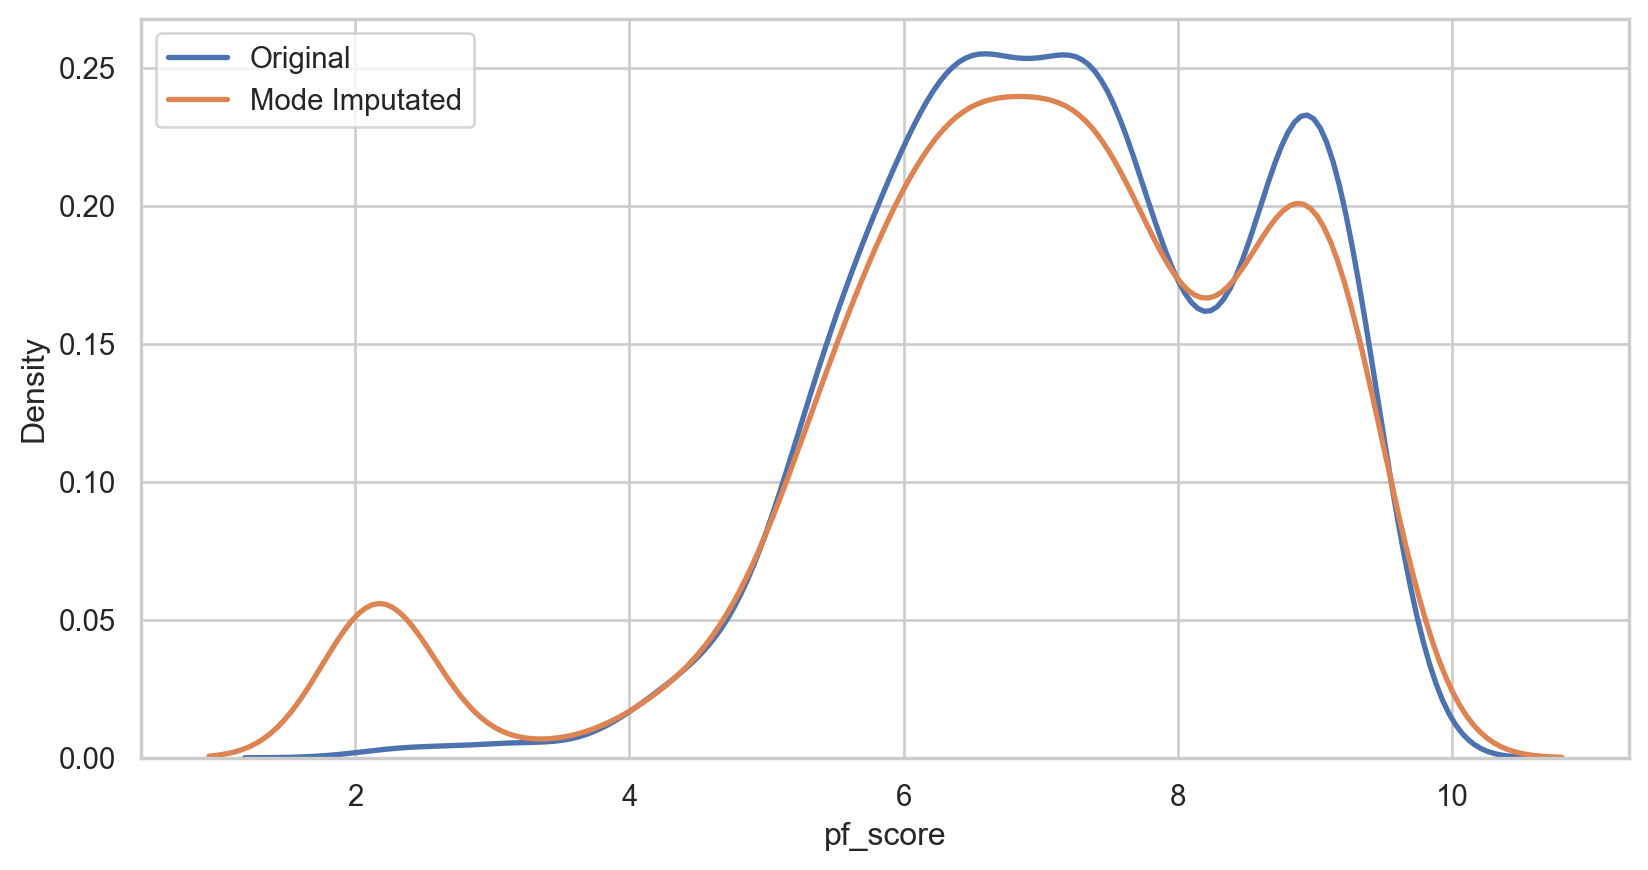

In [14]:
#| echo: false

mode_imputer = SimpleImputer(strategy = 'most_frequent')
hfi_copy['mode_pf_score'] = mode_imputer.fit_transform(hfi_copy[['pf_score']])

mode_plot = sns.kdeplot(data = hfi_copy, x = 'pf_score', linewidth = 2, label = "Original")

mode_plot = sns.kdeplot(data = hfi_copy, x = 'mode_pf_score', linewidth = 2, label = "Mode Imputated")

plt.legend()

plt.show()

In [15]:
#| eval: false
#| code-line-numbers: 1-12|1,2

mode_imputer = SimpleImputer(strategy = 'most_frequent')
hfi_copy['mode_pf_score'] = mode_imputer.fit_transform(hfi_copy[['pf_score']])

mode_plot = sns.kdeplot(data = hfi_copy, x = 'pf_score', linewidth = 2, label = "Original")

mode_plot = sns.kdeplot(data = hfi_copy, x = 'mode_pf_score', linewidth = 2, label = "Mode Imputated")

plt.legend()

plt.show()

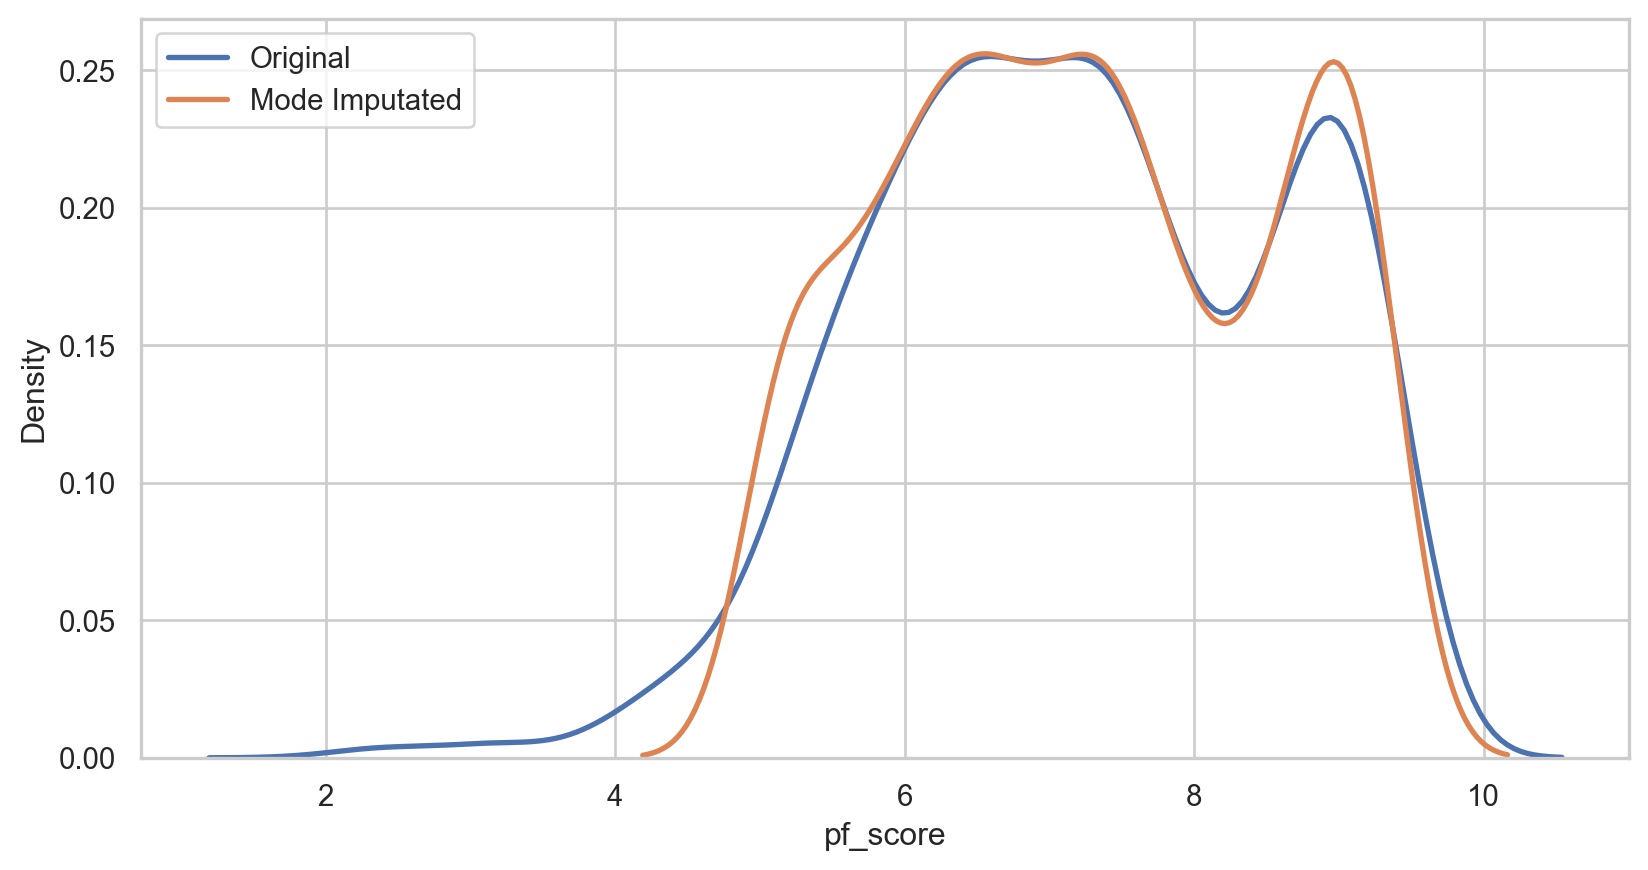

In [16]:
#| echo: false

upper_limit = np.percentile(hfi_copy['pf_score'].dropna(), 95)
lower_limit = np.percentile(hfi_copy['pf_score'].dropna(), 5)

hfi_copy['capped_pf_score'] = np.clip(hfi_copy['pf_score'], lower_limit, upper_limit)

cap_plot = sns.kdeplot(data = hfi_copy, x = 'pf_score', linewidth = 2, label = "Original")

cap_plot = sns.kdeplot(data = hfi_copy, x = 'capped_pf_score', linewidth = 2, label = "Mode Imputated")

plt.legend()

plt.show()

In [17]:
#| eval: false
#| code-line-numbers: 1-12|1,2,4

upper_limit = np.percentile(hfi_copy['pf_score'].dropna(), 95)
lower_limit = np.percentile(hfi_copy['pf_score'].dropna(), 5)

hfi_copy['capped_pf_score'] = np.clip(hfi_copy['pf_score'], lower_limit, upper_limit)

cap_plot = sns.kdeplot(data = hfi_copy, x = 'pf_score', linewidth = 2, label = "Original")

cap_plot = sns.kdeplot(data = hfi_copy, x = 'capped_pf_score', linewidth = 2, label = "Mode Imputated")

plt.legend()

plt.show()

In [18]:
hfi['year'] = pd.to_datetime(hfi['year'], format='%Y')

hfi.head(1)

year ISO_code countries          region  pf_rol_procedural  \
0 2016-01-01      ALB   Albania  Eastern Europe           6.661503   

   pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  \
0      4.547244         4.666508  5.291752        8.920429   

   pf_ss_disappearances_disap  ...  ef_regulation  ef_score  ef_rank  \
0                        10.0  ...       6.906901      7.54     34.0   

   hf_score  hf_rank  hf_quartile  mean_pf_score  median_pf_score  \
0   7.56814     48.0          2.0       7.596281         7.596281   

   mode_pf_score  capped_pf_score  
0       7.596281         7.596281  

[1 rows x 127 columns]

In [19]:
hfi.dtypes

year                 datetime64[ns]
ISO_code                     object
countries                    object
region                       object
pf_rol_procedural           float64
                          ...      
hf_quartile                 float64
mean_pf_score               float64
median_pf_score             float64
mode_pf_score               float64
capped_pf_score             float64
Length: 127, dtype: object

In [20]:
hfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 127 entries, year to capped_pf_score
dtypes: datetime64[ns](1), float64(123), object(3)
memory usage: 1.4+ MB


In [21]:
hfi.drop_duplicates(inplace = True)
hfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 127 entries, year to capped_pf_score
dtypes: datetime64[ns](1), float64(123), object(3)
memory usage: 1.4+ MB


In [22]:
#| code-line-numbers: 1-6|1|2|5,6
options = ['United States', 'India', 'Canada', 'China']

filtered_hfi = hfi[hfi['countries'].isin(options)]

unique_countries = filtered_hfi['countries'].unique()
print(unique_countries)

['Canada' 'China' 'India' 'United States']


/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/3130432550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(filtered_hfi, x = "pf_score", y = "countries", palette = "colorblind")


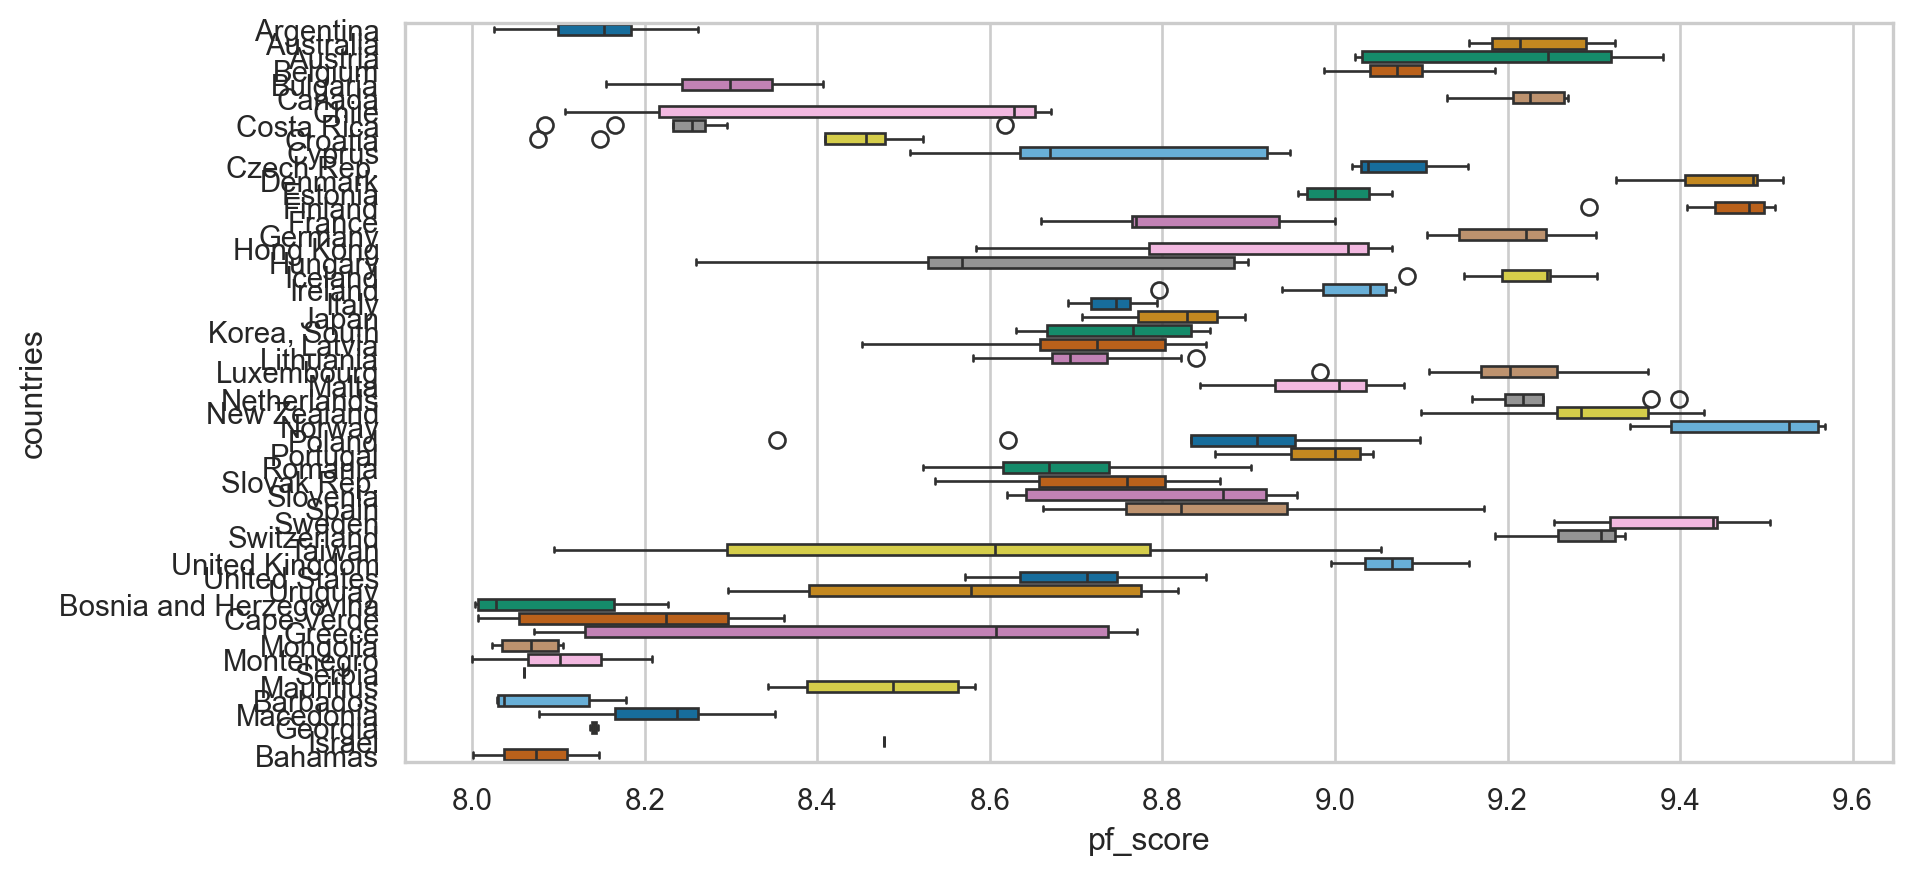

In [23]:
#| code-line-numbers: 1-3|1
filtered_hfi = hfi[hfi['pf_score'] > 8]
sns.boxplot(filtered_hfi, x = "pf_score", y = "countries", palette = "colorblind")
plt.show()

Mean: 5
Standard Deviation: 2


/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/2833767359.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(X, shade=True)


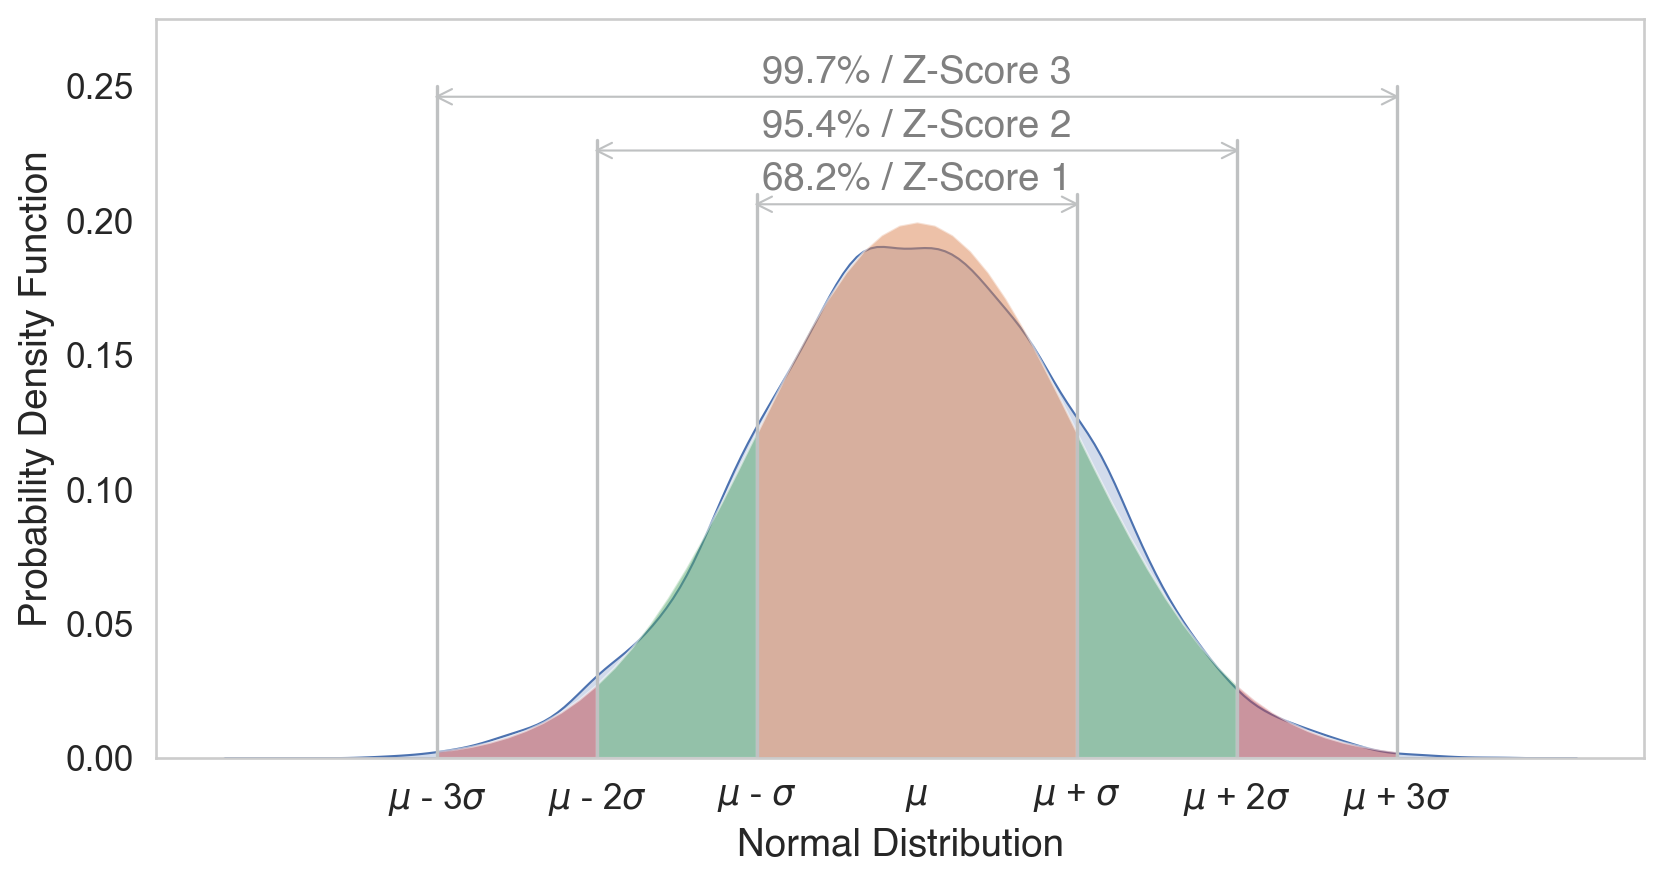

In [24]:
#| echo: false
import numpy as np
from scipy.stats import norm
import random
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(123)


# Line width: Maximum 130 characters in the output, post which it will continue in next line.
np.set_printoptions(linewidth=130)

sns.set_context("paper", font_scale=1.5)

# Distribution
mean = 5
std = 2
X = np.random.randn(10000)
X = (X - X.mean())/X.std()*std + mean

print("Mean:", mean)
print("Standard Deviation:", std)

"""
Mean: 5.0
Standard Deviation: 2.0
"""

plt.figure(figsize=(10, 5))

ax = sns.kdeplot(X, shade=True)

N = 10
for i in [1, 2, 3]:
    x1 = np.linspace(mean - i*std, mean - (i - 1)*std, N)
    x2 = np.linspace(mean - (i - 1)*std, mean + (i - 1)*std, N)
    x3 = np.linspace(mean + (i - 1)*std, mean + i*std, N)
    x = np.concatenate((x1, x2, x3))
    x = np.where((mean - (i - 1)*std < x) & (x < mean + (i - 1)*std), np.nan, x)
    y = norm.pdf(x, mean, std)
    ax.fill_between(x, y, alpha=0.5)

ax.plot([mean - std, mean - std], [0, 0.21], linewidth=1.25, color='#bfc1c2')
ax.plot([mean - (2*std), mean - (2*std)], [0, 0.23], linewidth=1.25, color='#bfc1c2')
ax.plot([mean - (3*std), mean - (3*std)], [0, 0.25], linewidth=1.25, color='#bfc1c2')
ax.plot([mean + std, mean + std], [0, 0.21], linewidth=1.25, color='#bfc1c2')
ax.plot([mean + (2*std), mean + (2*std)], [0, 0.23], linewidth=1.25, color='#bfc1c2')
ax.plot([mean + (3*std), mean + (3*std)], [0, 0.25], linewidth=1.25, color='#bfc1c2')

ax.annotate('', xy=(mean - std - 0.1, 0.206), xytext=(mean + std + 0.1, 0.206),
            arrowprops=dict(arrowstyle="<->", color='#bfc1c2'))
ax.annotate('', xy=(mean - (2*std) - 0.1, 0.226), xytext=(mean + (2*std) + 0.1, 0.226),
            arrowprops=dict(arrowstyle="<->", color='#bfc1c2'))
ax.annotate('', xy=(mean - (3*std) - 0.1, 0.246), xytext=(mean + (3*std) + 0.1, 0.246),
            arrowprops=dict(arrowstyle="<->", color='#bfc1c2'))
ax.annotate('68.2% / Z-Score 1', xy=(mean, 0.215), ha='center', va='center', color = 'gray', fontweight = "bold", fontname = "Helvetica")
ax.annotate('95.4% / Z-Score 2', xy=(mean, 0.235), ha='center', va='center', color = 'gray', fontweight = "bold", fontname = "Helvetica")
ax.annotate('99.7% / Z-Score 3', xy=(mean, 0.255), ha='center', va='center', color = 'gray', fontweight = "bold", fontname = "Helvetica")


plt.xlabel("Normal Distribution", fontname = "Helvetica")
plt.ylabel("Probability Density Function", fontname = "Helvetica")
ax.set_ylim([0, 0.275])
ax.set_xticks([(mean - (3 * std)), 
               (mean - (2 * std)), 
               (mean - std), 
               mean, 
               (mean + std), 
               (mean + (2 * std)), 
               (mean + (3 * std))])
ax.set_xticklabels(['$\\mu$ - 3$\\sigma$','$\\mu$ - 2$\\sigma$','$\\mu$ - $\\sigma$','$\\mu$','$\\mu$ + $\\sigma$','$\\mu$ + 2$\\sigma$','$\\mu$ + 3$\\sigma$'])
plt.grid()

plt.show()

In [25]:
#| code-line-numbers: 1-6|3,4|5
hfi_copy = hfi

scaler = StandardScaler()
hfi_copy[['ef_score_scale', 'pf_score_scale']] = scaler.fit_transform(hfi_copy[['ef_score', 'pf_score']])

hfi_copy[['ef_score_scale', 'pf_score_scale']].describe()

ef_score_scale  pf_score_scale
count    1.378000e+03    1.378000e+03
mean     4.524683e-16    2.062533e-17
std      1.000363e+00    1.000363e+00
min     -4.421711e+00   -3.663087e+00
25%     -6.063870e-01   -7.303950e-01
50%      1.295064e-01   -8.926277e-03
75%      7.068997e-01    9.081441e-01
max      2.722116e+00    1.722056e+00

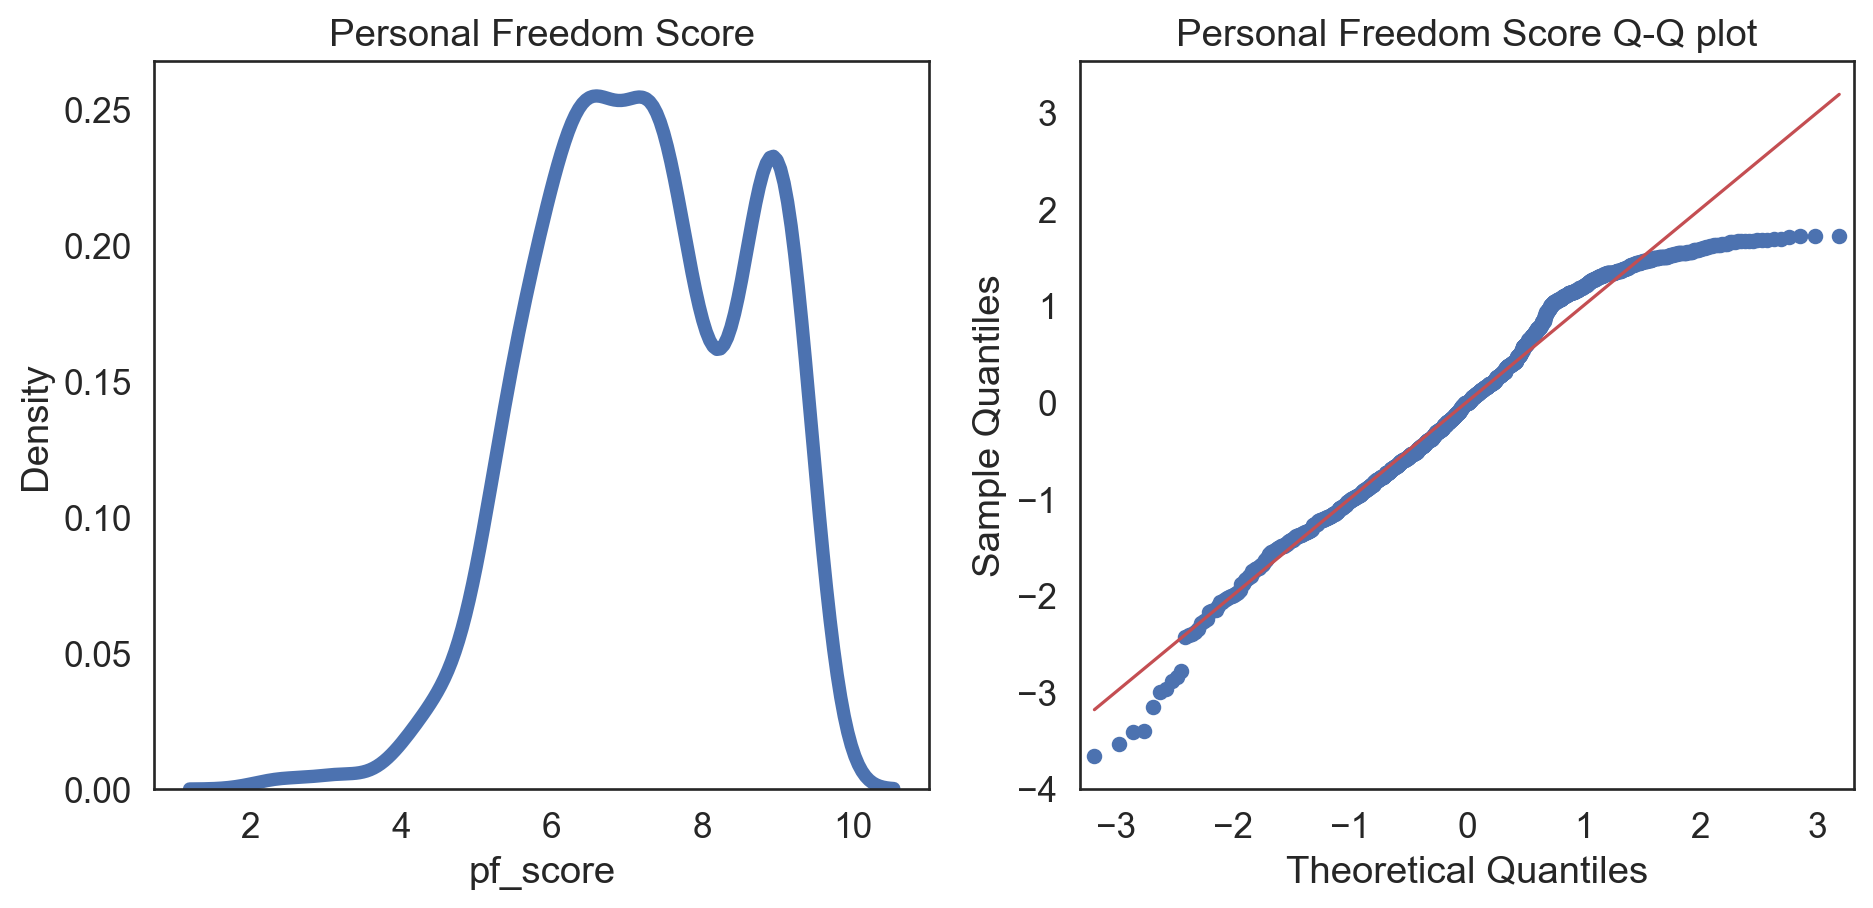

In [26]:
#| code-fold: true

hfi_clean = hfi_copy.dropna(subset = ['pf_score'])

sns.set_style("white")

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(data = hfi_clean, x = "pf_score", linewidth = 5, ax = ax1)
ax1.set_title('Personal Freedom Score')

sm.qqplot(hfi_clean['pf_score'], line = 's', ax = ax2, dist = stats.norm, fit = True)
ax2.set_title('Personal Freedom Score Q-Q plot')

plt.tight_layout()
plt.show()

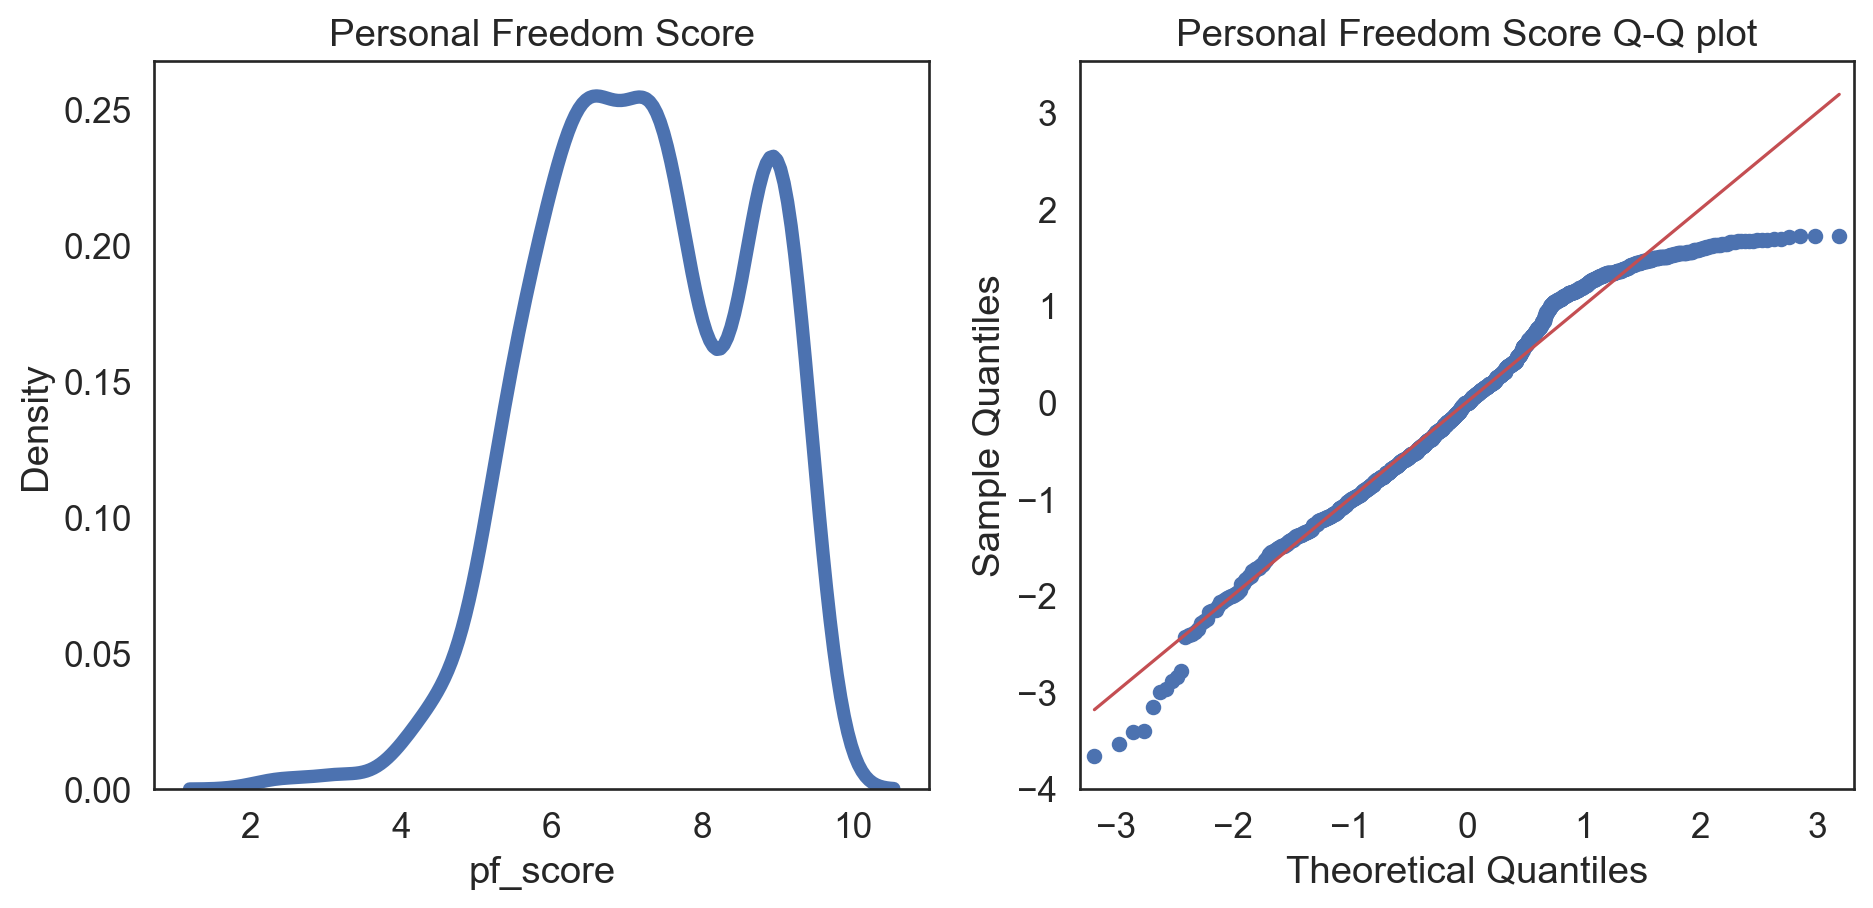

In [27]:
#| echo: false

hfi_clean = hfi_copy.dropna(subset = ['pf_score'])

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(data = hfi_clean, x = "pf_score", linewidth = 5, ax = ax1)
ax1.set_title('Personal Freedom Score')

sm.qqplot(hfi_clean['pf_score'], line = 's', ax = ax2, dist = stats.norm, fit = True)
ax2.set_title('Personal Freedom Score Q-Q plot')

plt.tight_layout()
plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/948691471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfi_clean['pf_score_sqrt'] = np.sqrt(hfi_clean['pf_score'])


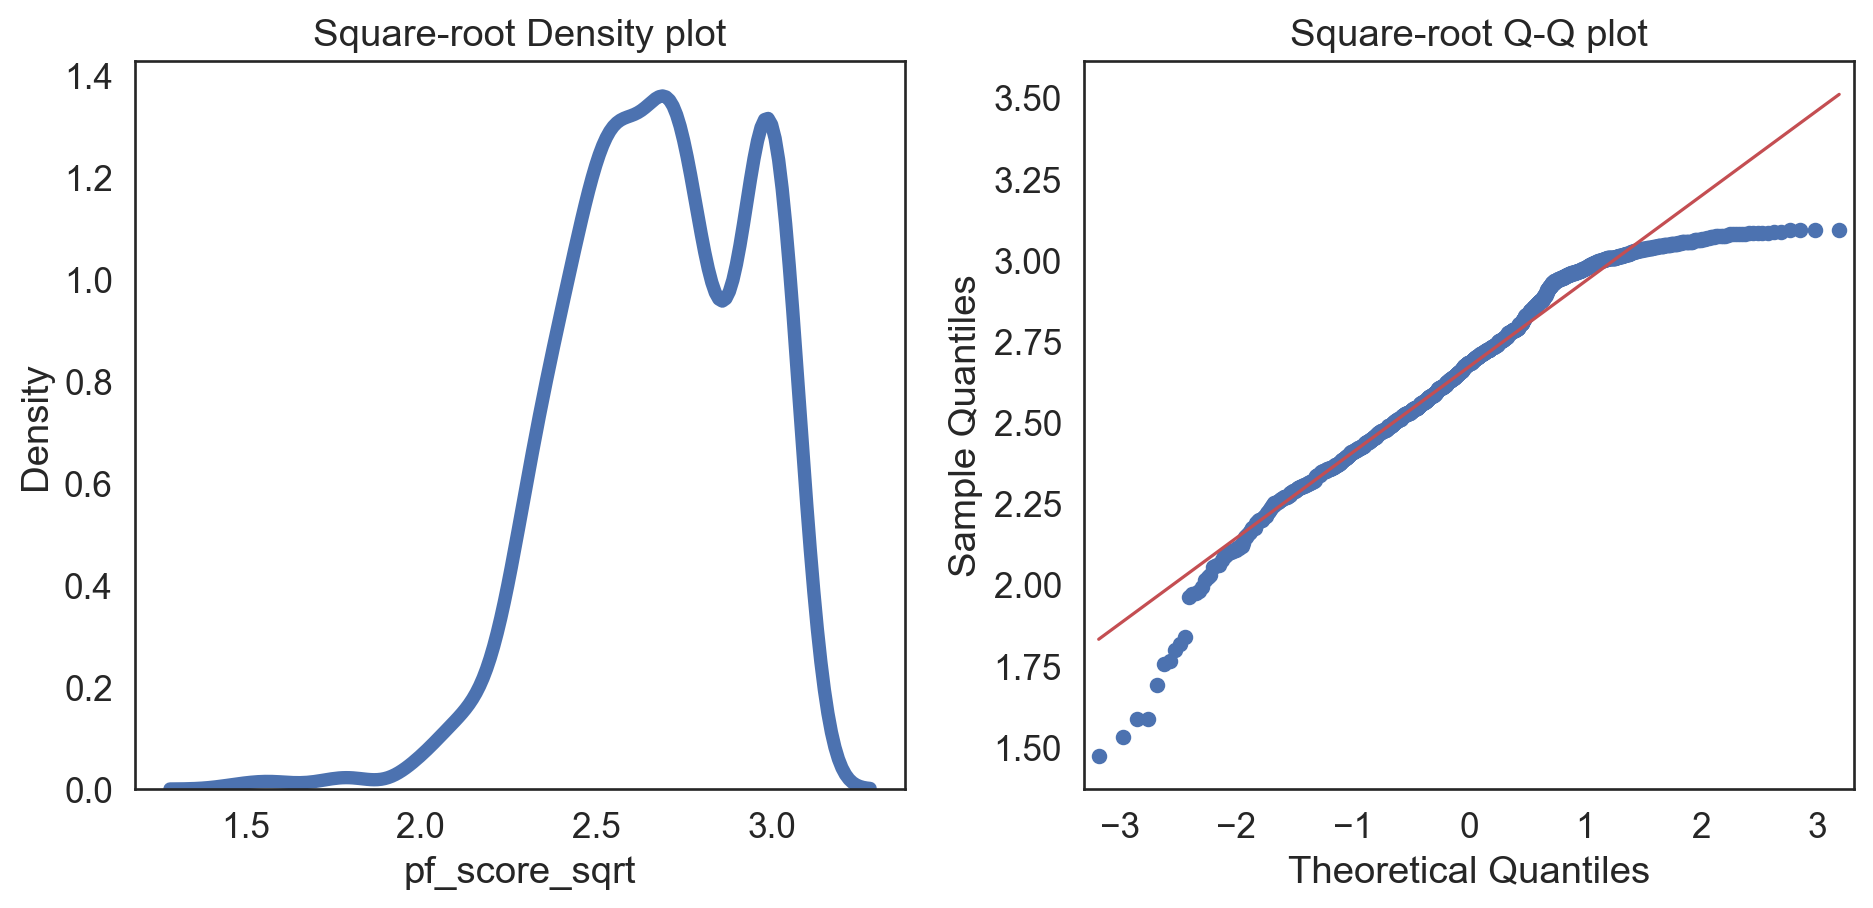

In [28]:
#| code-fold: true
#| code-line-numbers: 1-13|1|2,7,10
hfi_clean['pf_score_sqrt'] = np.sqrt(hfi_clean['pf_score'])

col = hfi_clean['pf_score_sqrt']

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Square-root Density plot')    

sm.qqplot(col, line = 's', ax = ax2)
ax2.set_title('Square-root Q-Q plot')    
plt.tight_layout()
plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/3503380198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfi_clean['pf_score_log'] = np.log(hfi_clean['pf_score'] + 1)


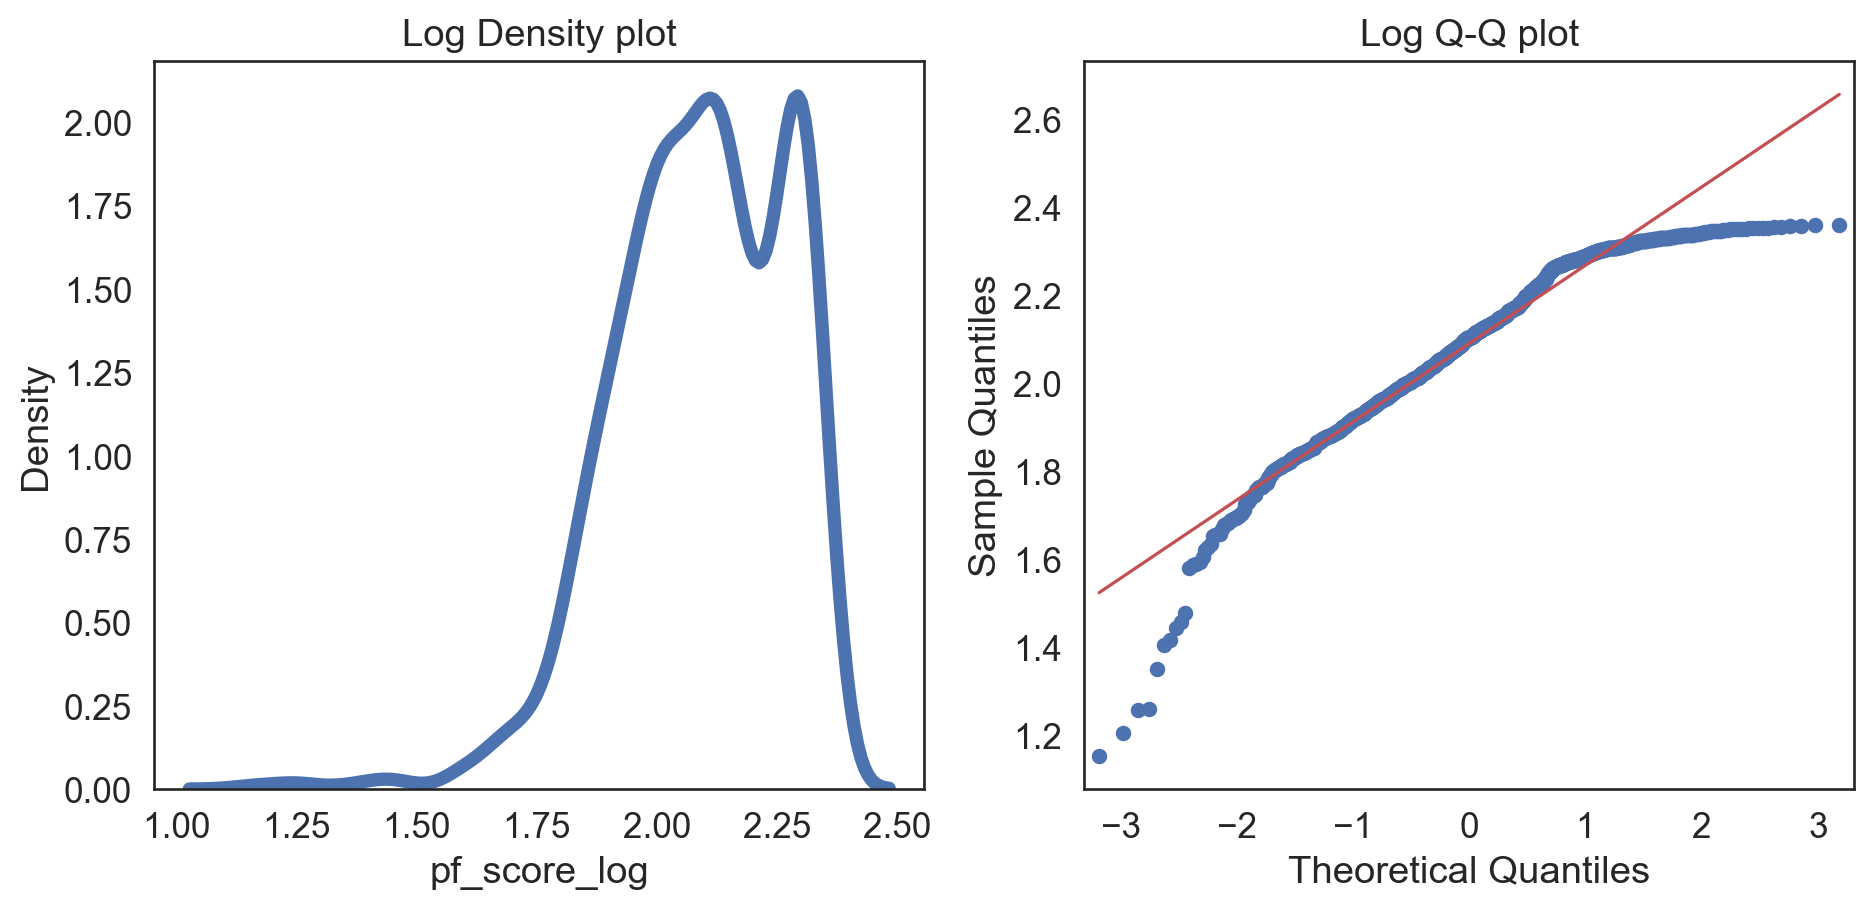

In [29]:
#| code-fold: true
#| code-line-numbers: 1-13|1
hfi_clean['pf_score_log'] = np.log(hfi_clean['pf_score'] + 1)

col = hfi_clean['pf_score_log']

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Log Density plot')    

sm.qqplot(col, line = 's', ax = ax2)
ax2.set_title('Log Q-Q plot')    
plt.tight_layout()
plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/1555248426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfi_clean['pf_score_inv'] = 1/hfi_clean.pf_score


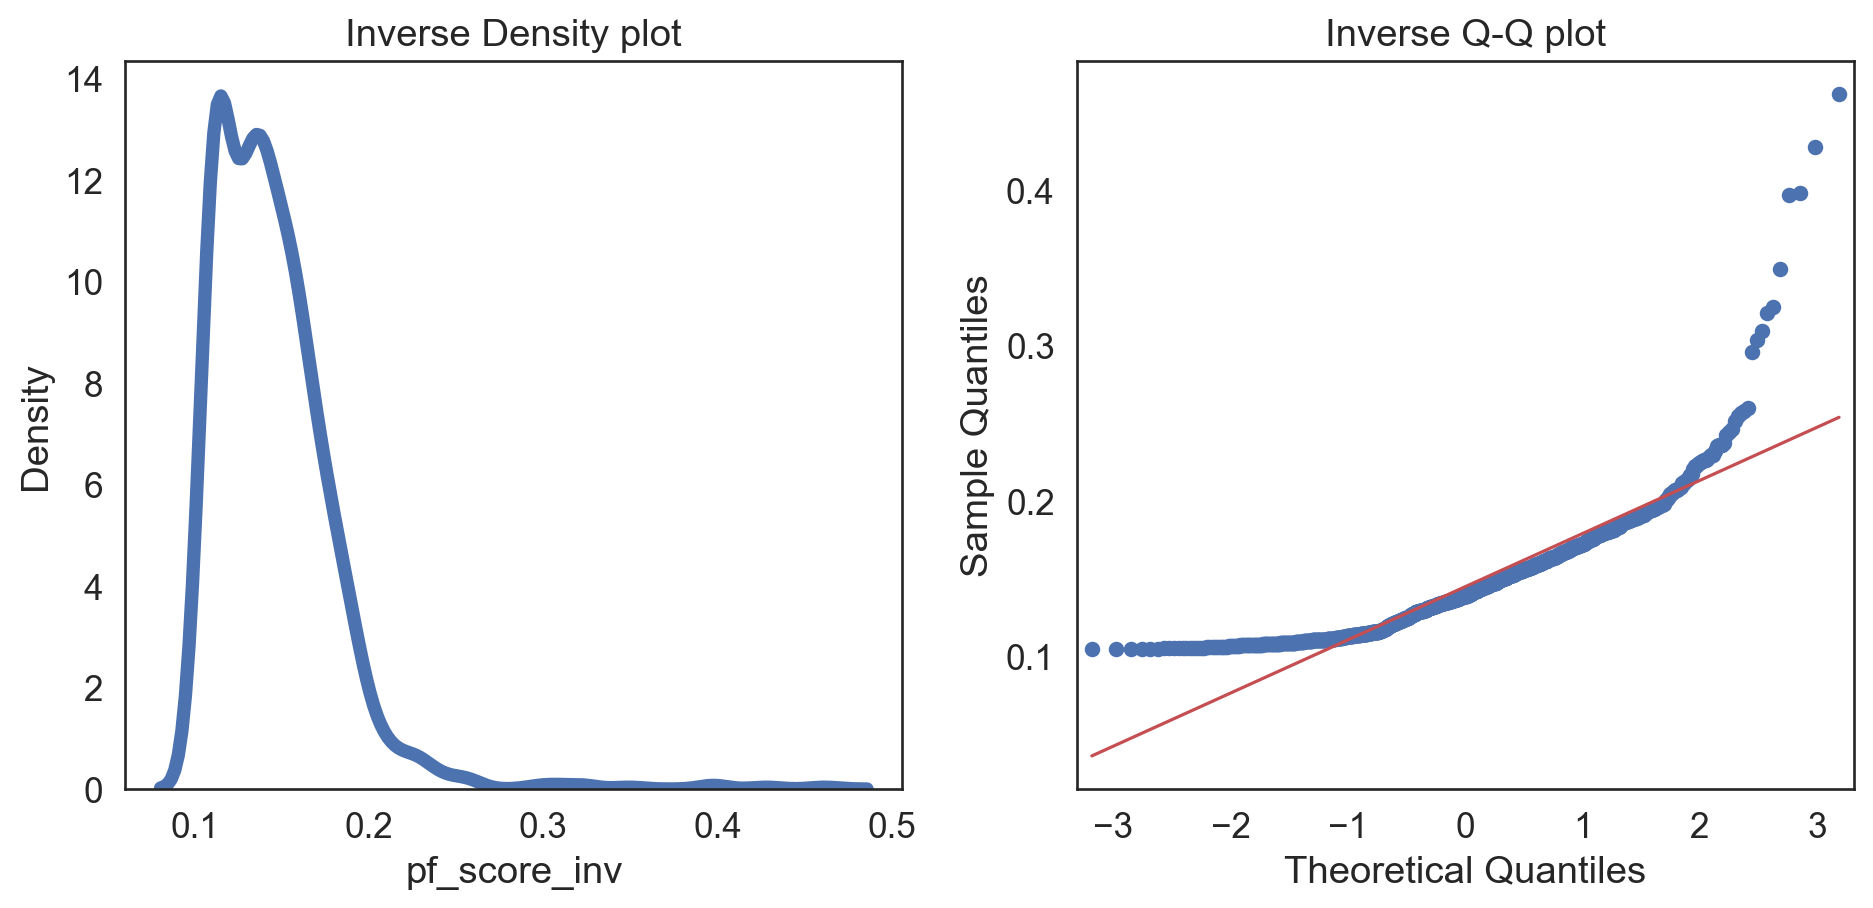

In [30]:
#| code-fold: true
#| code-line-numbers: 1-13|1
hfi_clean['pf_score_inv'] = 1/hfi_clean.pf_score

col = hfi_clean['pf_score_inv']

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Inverse Density plot')    

sm.qqplot(col, line = 's', ax = ax2)
ax2.set_title('Inverse Q-Q plot')    
plt.tight_layout()
plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/1432876819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfi_clean['pf_score_square'] = pow(hfi_clean.pf_score, 2)


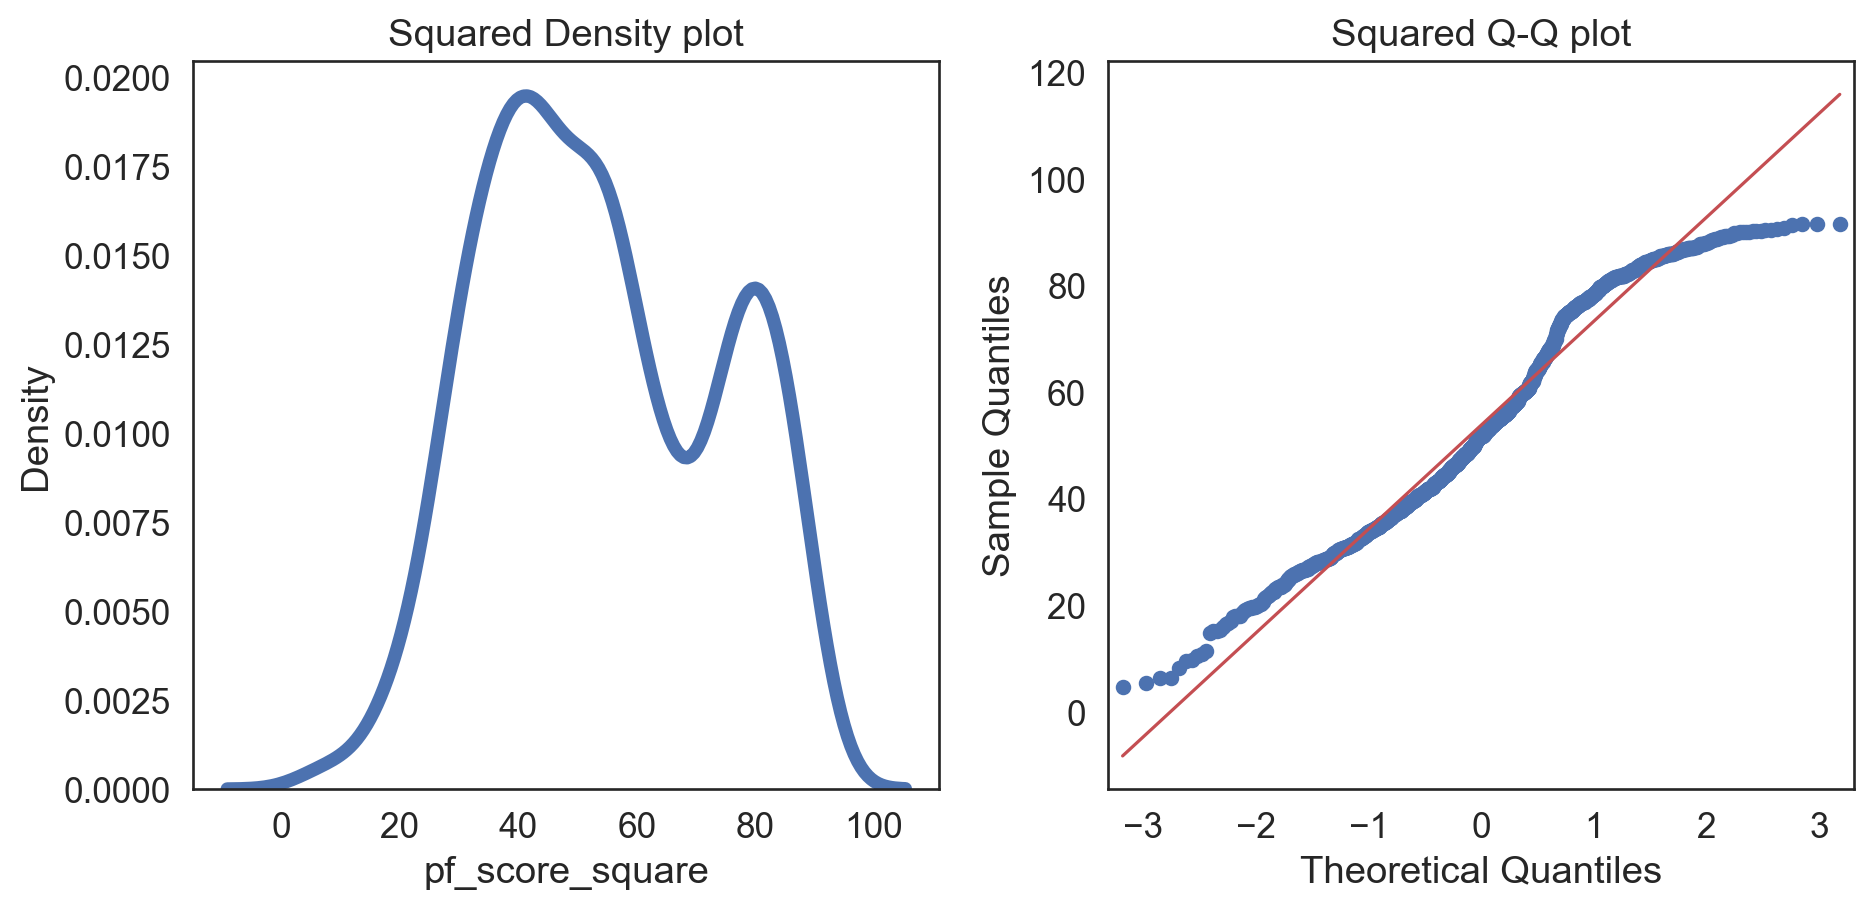

In [31]:
#| code-fold: true
#| code-line-numbers: 1-13|1
hfi_clean['pf_score_square'] = pow(hfi_clean.pf_score, 2)

col = hfi_clean['pf_score_square']

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Squared Density plot')    

sm.qqplot(col, line = 's', ax = ax2)
ax2.set_title('Squared Q-Q plot')    
plt.tight_layout()
plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/1216531968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfi_clean['pf_score_cube'] = pow(hfi_clean.pf_score, 3)


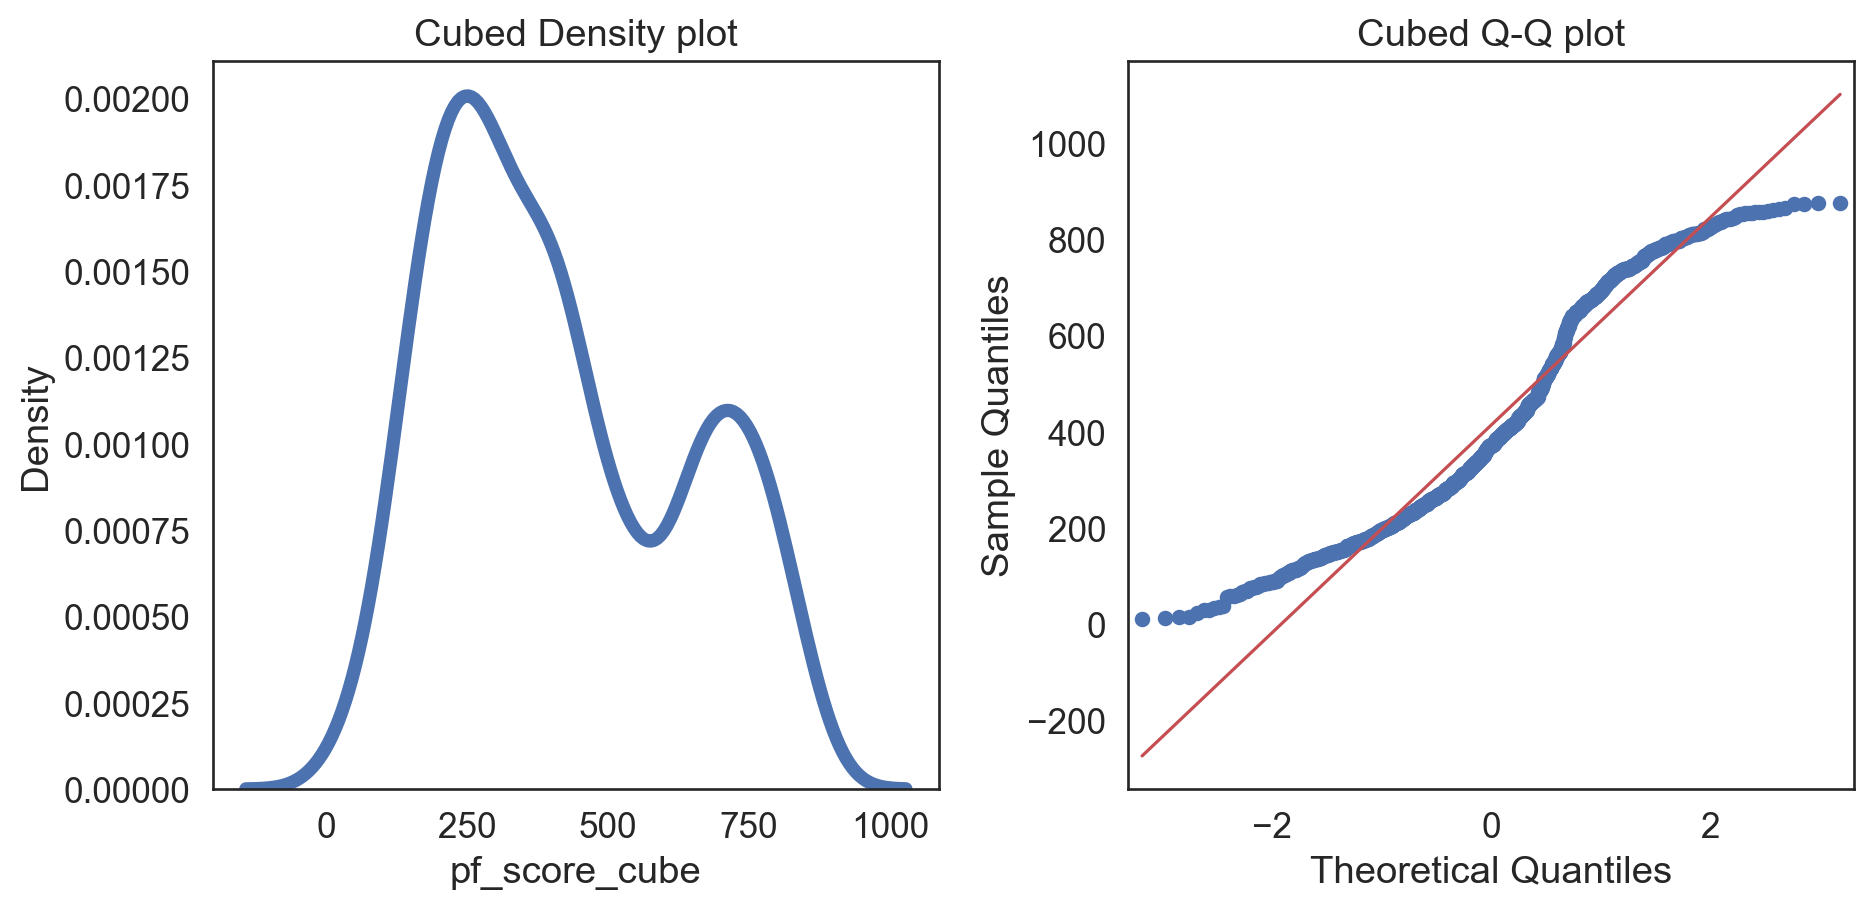

In [32]:
#| code-fold: true
#| code-line-numbers: 1-13|1
hfi_clean['pf_score_cube'] = pow(hfi_clean.pf_score, 3)

col = hfi_clean['pf_score_cube']

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Cubed Density plot')    

sm.qqplot(col, line = 's', ax = ax2)
ax2.set_title('Cubed Q-Q plot')    
plt.tight_layout()
plt.show()

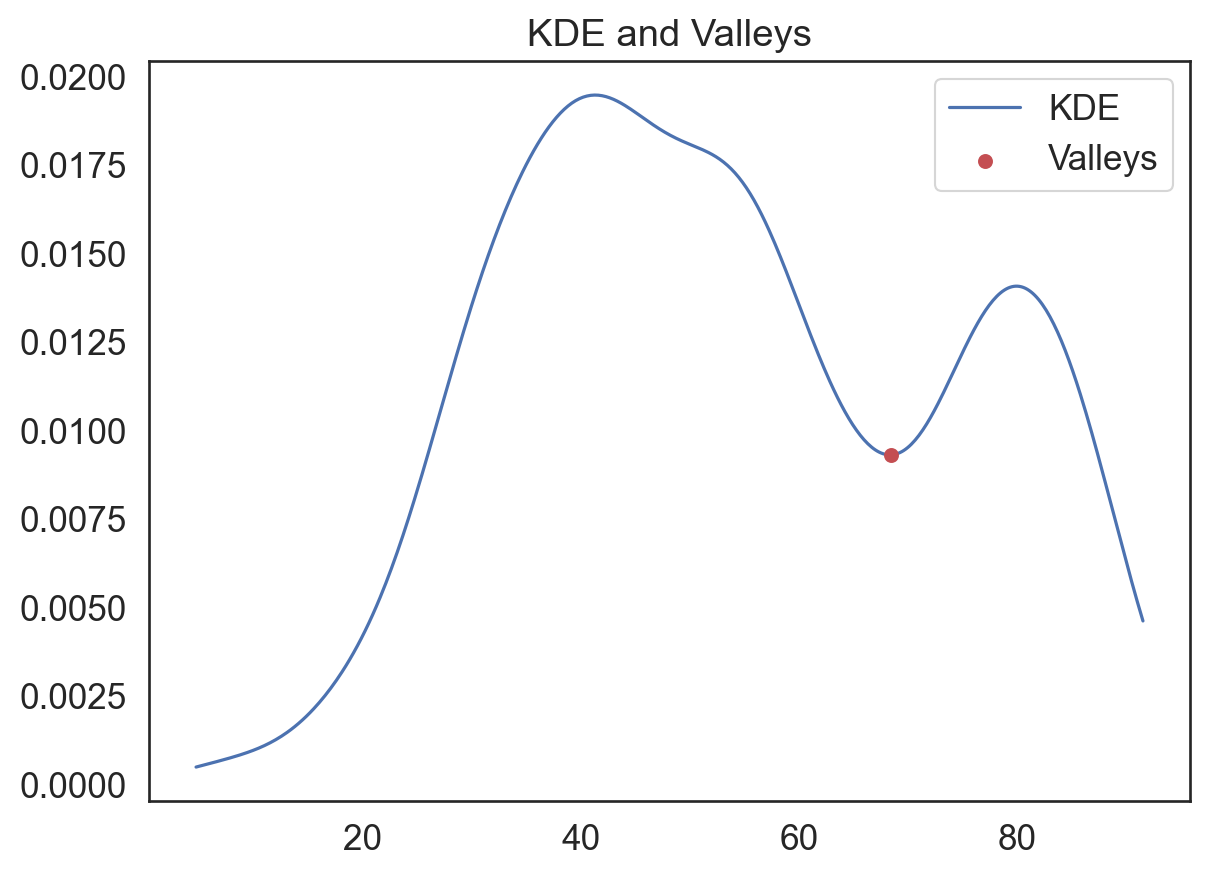

Valley x-values: [68.39968248]


In [33]:
#| code-fold: true
#| code-line-numbers: 1-16|1-4|6,7|12|16
values = hfi_clean['pf_score_square']
kde = gaussian_kde(values, bw_method = 'scott')
x_eval = np.linspace(values.min(), values.max(), num = 500) 
kde_values = kde(x_eval)

minima_indices = argrelextrema(kde_values, np.less)[0]
valleys = x_eval[minima_indices]

plt.figure(figsize = (7, 5))
plt.title('KDE and Valleys')
sns.lineplot(x = x_eval, y = kde_values, label = 'KDE')
plt.scatter(x = valleys, y = kde(valleys), color = 'r', zorder = 5, label = 'Valleys')
plt.legend()
plt.show()

print("Valley x-values:", valleys)

In [34]:
#| code-line-numbers: 1-5|1,2|4
valley = 68.39968248
hfi_clean['group'] = np.where(hfi_clean['pf_score_square'] < valley, 'group1', 'group2')

data = hfi_clean[['group', 'pf_score_square']].sort_values(by = 'pf_score_square')
data.head()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/2916174145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hfi_clean['group'] = np.where(hfi_clean['pf_score_square'] < valley, 'group1', 'group2')


group  pf_score_square
159  group1         4.693962
321  group1         5.461029
141  group1         6.308405
483  group1         6.345709
303  group1         8.189057

In [35]:
data.tail()

group  pf_score_square
435   group2        90.755418
1407  group2        91.284351
597   group2        91.396839
1083  group2        91.428990
759   group2        91.549575

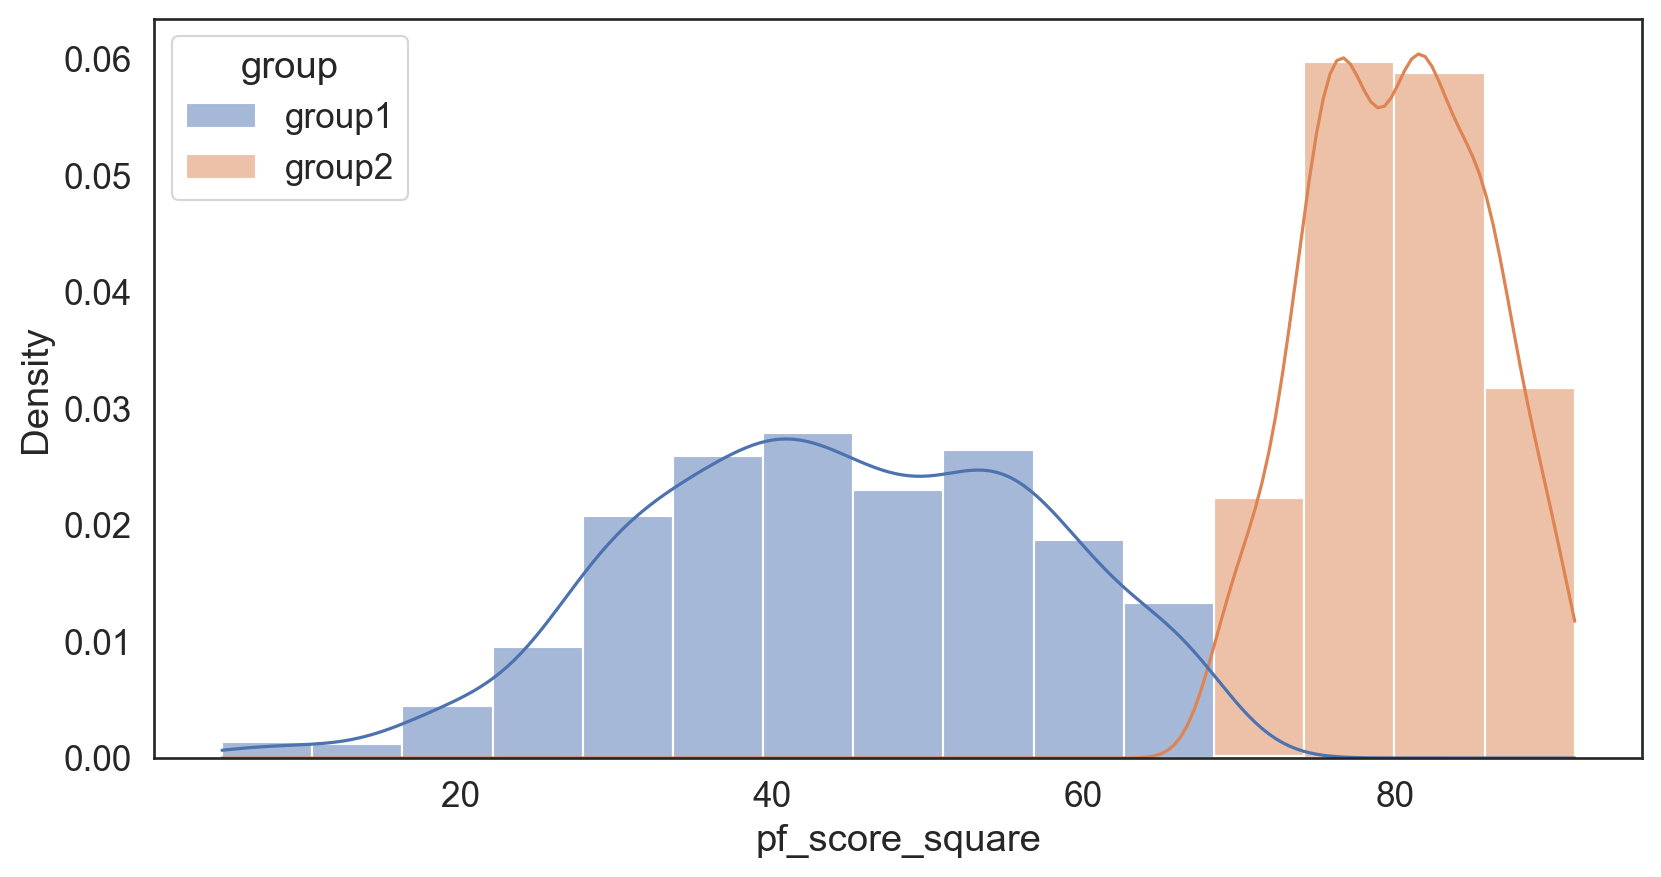

In [36]:
#| code-fold: true
sns.histplot(data = hfi_clean, x = "pf_score_square", 
            hue = "group", kde = True, stat = "density", common_norm = False)

plt.show()

In [37]:
numeric_cols = hfi.select_dtypes(include = [np.number]).columns

# Applying mean imputation only to numeric columns
hfi[numeric_cols] = hfi[numeric_cols].fillna(hfi[numeric_cols].mean())

features = ['pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'hf_score', 'hf_rank', 'hf_quartile']

x = hfi.loc[:, features].values
y = hfi.loc[:, 'region'].values
x = StandardScaler().fit_transform(x)

In [38]:
#| code-fold: true
#| code-line-numbers: 1-5|1|2|3|4|5 
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca_variance_explained = pca.explained_variance_ratio_
print("Variance explained:", pca_variance_explained, "\n", principalDf)

Variance explained: [0.76138995 0.15849799] 
       principal component 1  principal component 2
0              5.164625e-01          -9.665680e-01
1             -2.366765e+00           1.957381e+00
2             -2.147729e+00           1.664483e+00
3             -2.784437e-01           8.066415e-01
4              3.716205e-01          -4.294282e-01
...                     ...                    ...
1453          -4.181375e+00          -4.496988e-01
1454          -5.213024e-01           6.010449e-01
1455           1.374342e-16          -2.907121e-16
1456          -1.545577e+00          -5.422255e-01
1457          -3.669011e+00           4.294948e-01

[1458 rows x 2 columns]


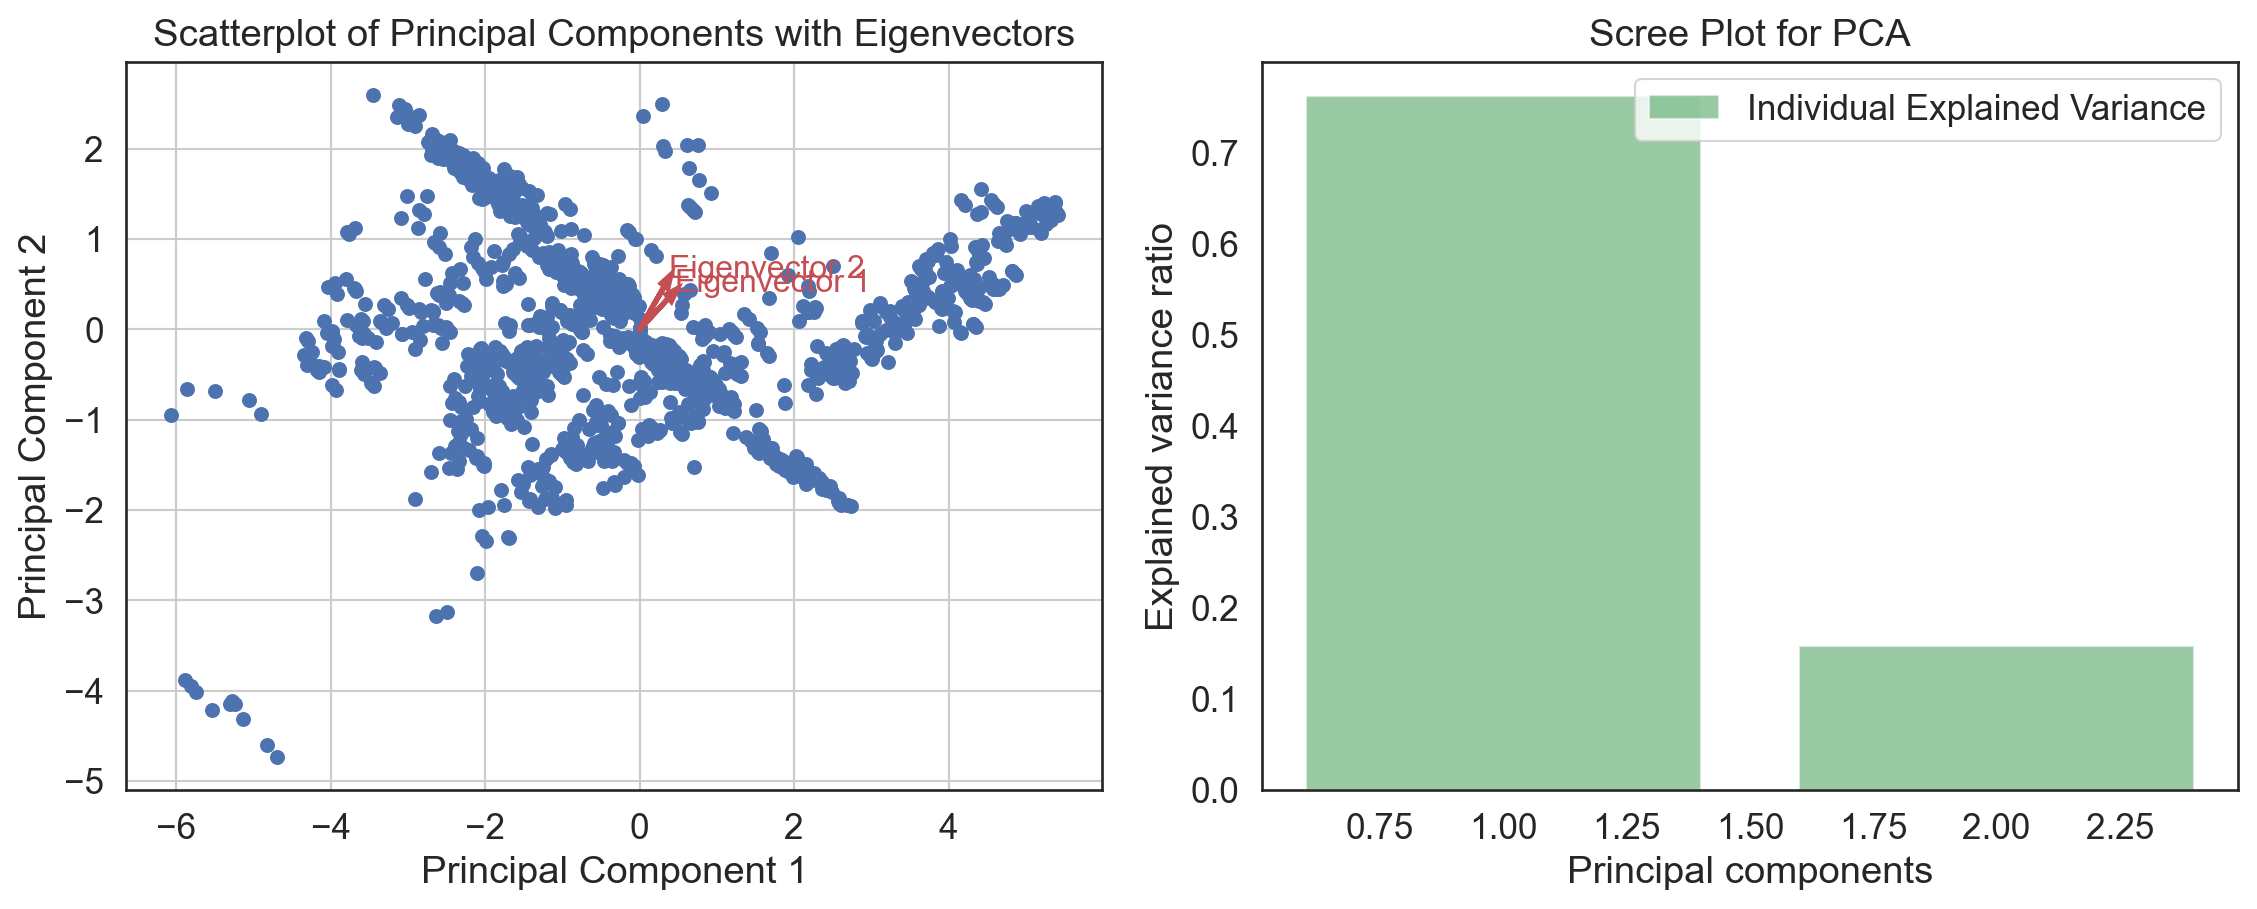

In [39]:
#| code-fold: true
# Combining the scatterplot of principal components with the scree plot using the correct column names
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

# Scatterplot of Principal Components
axes[0].scatter(principalDf['principal component 1'], principalDf['principal component 2'])
for i in range(len(pca.components_)):
    axes[0].arrow(0, 0, pca.components_[i, 0], pca.components_[i, 1], head_width = 0.1, head_length = 0.15, fc = 'r', ec = 'r', linewidth = 2)
    axes[0].text(pca.components_[i, 0] * 1.2, pca.components_[i, 1] * 1.2, f'Eigenvector {i+1}', color = 'r', fontsize = 12)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('Scatterplot of Principal Components with Eigenvectors')
axes[0].grid()

# Scree Plot for PCA
axes[1].bar(range(1, len(pca_variance_explained) + 1), pca_variance_explained, alpha = 0.6, color = 'g', label = 'Individual Explained Variance')
axes[1].set_ylabel('Explained variance ratio')
axes[1].set_xlabel('Principal components')
axes[1].set_title('Scree Plot for PCA')
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [40]:
#| code-fold: true
#| code-line-numbers: 1-5|1|2|4 
tsne = TSNE(n_components = 2, random_state = 42)
tsne_results = tsne.fit_transform(x)

tsne_df = pd.DataFrame(data = tsne_results, columns = ['tsne-2d-one', 'tsne-2d-two'])
tsne_df

tsne-2d-one  tsne-2d-two
0        8.723544   -30.771170
1      -28.243269    35.372395
2      -34.433094    34.752293
3       -6.945469    15.958995
4        6.562296   -19.255369
...           ...          ...
1453   -55.390907    -8.568928
1454   -12.814189    12.753754
1455    11.118634     7.232168
1456   -19.679014    -8.271861
1457   -54.577549    -2.688204

[1458 rows x 2 columns]

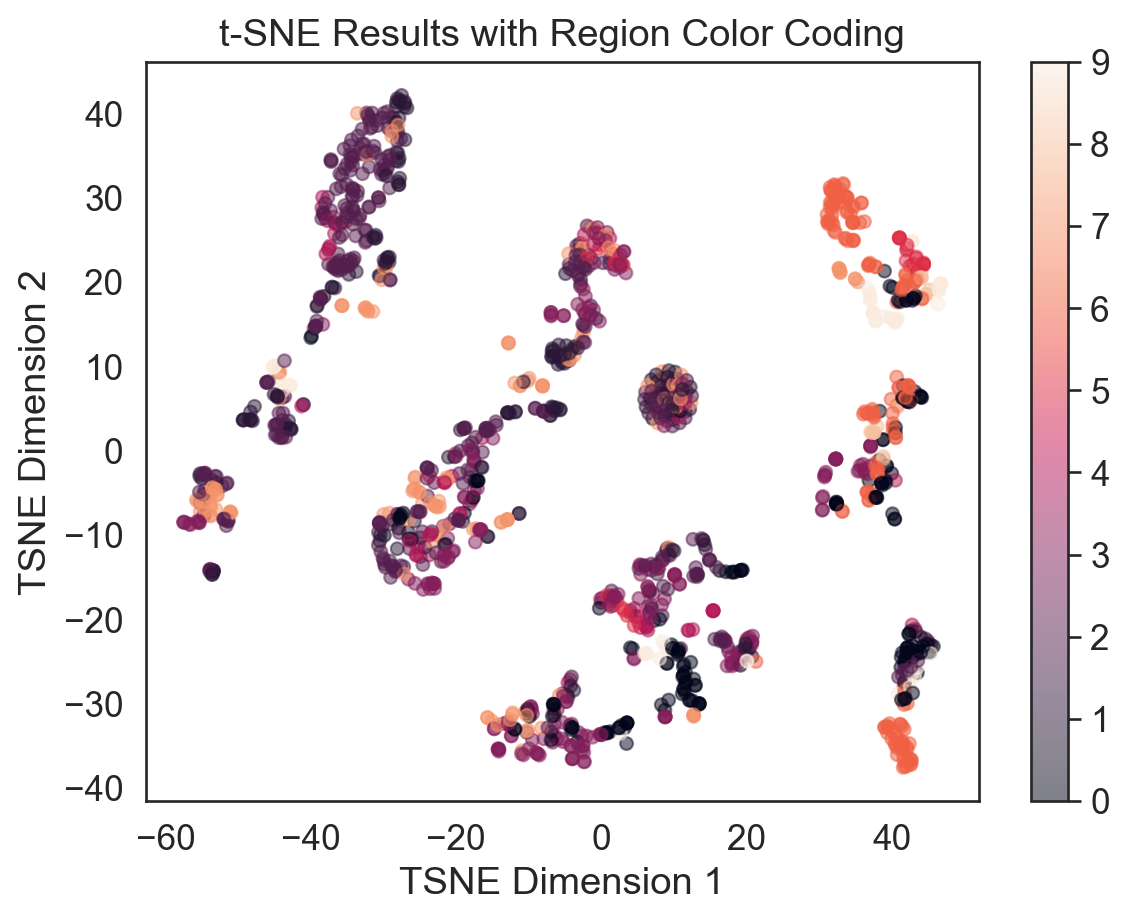

In [41]:
#| code-fold: true
tsne_df['region'] = y

plt.figure(figsize = (7, 5))
plt.scatter(tsne_df['tsne-2d-one'], tsne_df['tsne-2d-two'], c = pd.factorize(tsne_df['region'])[0], alpha=0.5)
plt.colorbar(ticks = range(len(np.unique(y))))
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title('t-SNE Results with Region Color Coding')
plt.show()

In [42]:
esi = pd.read_csv("data/esi.csv")
esi.head()

code    country   esi  system  stress  vulner   cap  global  sys_air  \
0  ALB    Albania  58.8    52.4    65.4    72.3  46.2    57.9     0.45   
1  DZA    Algeria  46.0    43.1    66.3    57.5  31.8    21.1    -0.02   
2  AGO     Angola  42.9    67.9    59.1    11.8  22.1    39.1    -0.77   
3  ARG  Argentina  62.7    67.6    54.9    69.9  65.4    58.5     0.40   
4  ARM    Armenia  53.2    54.4    62.2    50.8  34.9    60.3     1.21   

   sys_bio  ...  vul_hea  vul_sus  vul_dis  cap_gov  cap_eff  cap_pri  cap_st  \
0     0.17  ...     0.32     0.79     0.66    -0.32     0.79    -0.65   -0.20   
1    -0.08  ...    -0.33     0.45     0.45    -0.69    -0.28    -0.66   -0.27   
2     0.77  ...    -1.75    -1.91     0.11    -0.96     0.12    -1.08   -1.16   
3     0.10  ...     0.85     0.69     0.03    -0.34     0.18     1.23    0.51   
4    -0.02  ...     0.29    -0.79     0.56    -0.38    -0.66    -0.55    0.03   

   glo_col  glo_ghg  glo_tbp  
0    -0.45     0.21     0.84  
1    -0.51    -0.56    -1.33  
2    -0.88     0.31    -0.26  
3     0.45     0.09     0.11  
4    -0.29    -0.29     1.37  

[5 rows x 29 columns]

In [43]:
#| code-line-numbers: 1-4|1-2|3
grouped_hfi = hfi.groupby('countries').agg({'region': 'first', 
                                            'pf_score': 'mean'
                                           }).reset_index()
grouped_hfi.head()

countries                         region  pf_score
0    Albania                 Eastern Europe  7.696934
1    Algeria     Middle East & North Africa  5.249383
2     Angola             Sub-Saharan Africa  5.856932
3  Argentina  Latin America & the Caribbean  8.120779
4    Armenia        Caucasus & Central Asia  7.192095

In [44]:
#| code-line-numbers: 1-5|1-2|4
grouped_hfi['country'] = grouped_hfi['countries']
merged_data = esi.merge(grouped_hfi, how = 'left', on = 'country')

esi_hfi = merged_data[['esi', 'pf_score', 'region', 'country']]
esi_hfi.head()

esi  pf_score                         region    country
0  58.8  7.696934                 Eastern Europe    Albania
1  46.0  5.249383     Middle East & North Africa    Algeria
2  42.9  5.856932             Sub-Saharan Africa     Angola
3  62.7  8.120779  Latin America & the Caribbean  Argentina
4  53.2  7.192095        Caucasus & Central Asia    Armenia

In [45]:
esi_hfi_red = esi_hfi.dropna()
esi_hfi_red.isna().sum()

esi         0
pf_score    0
region      0
country     0
dtype: int64

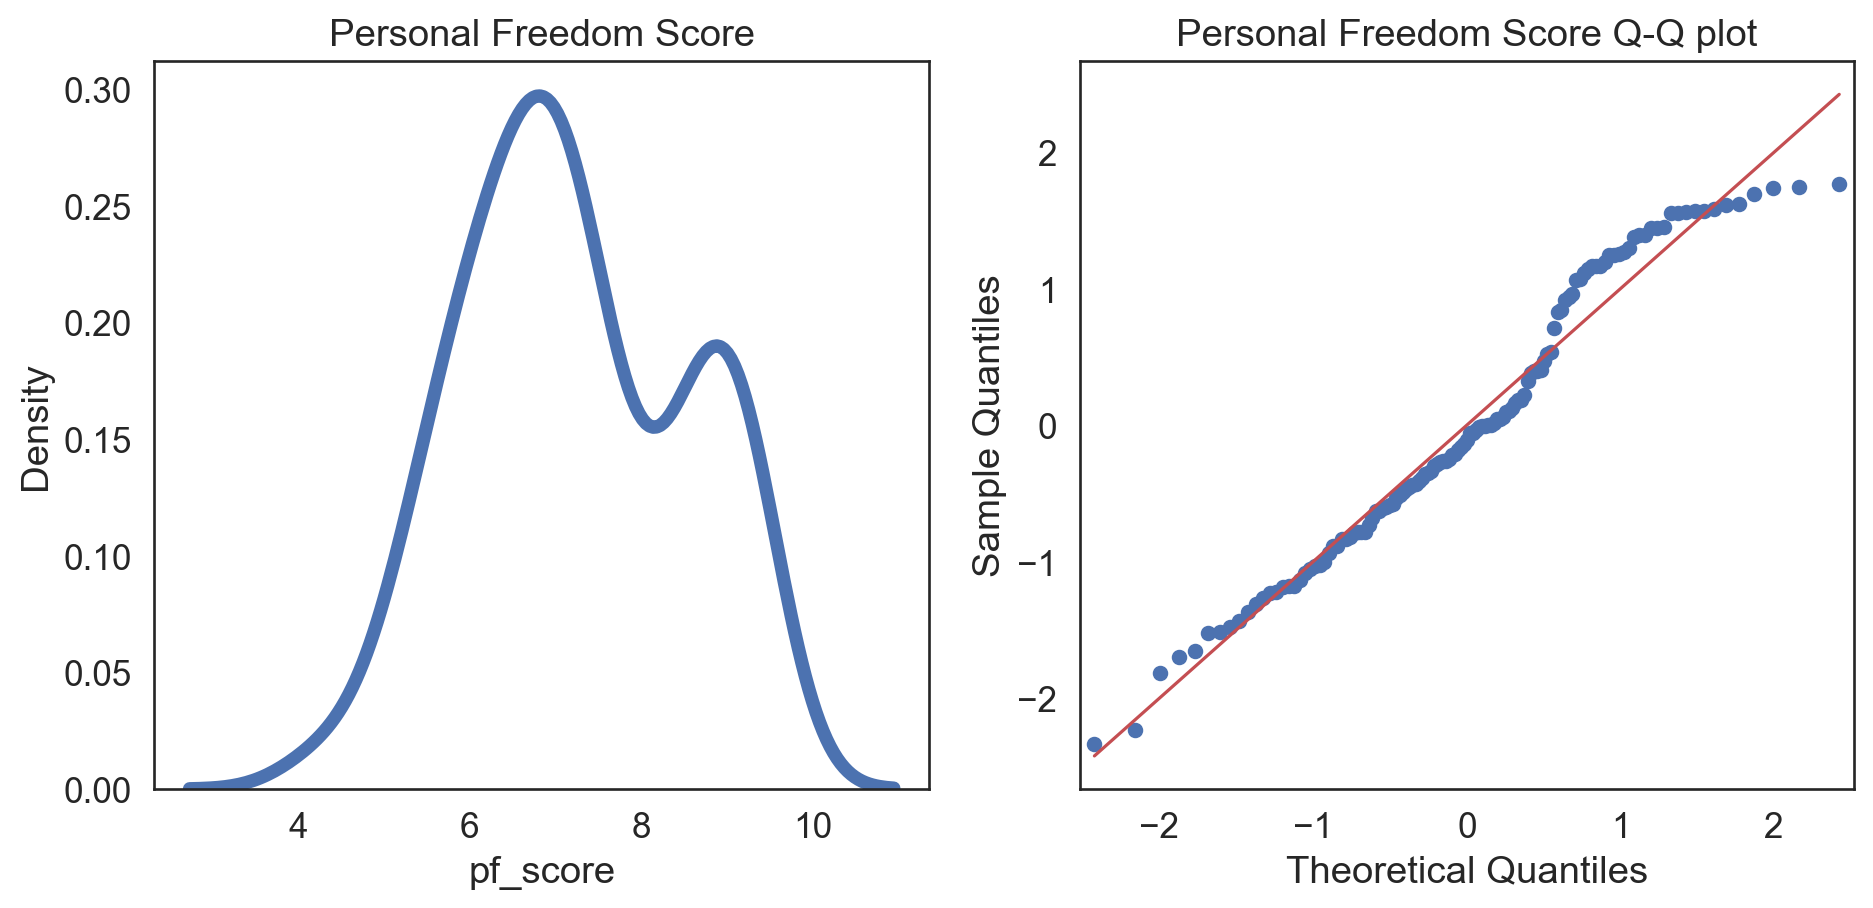

In [46]:
#| code-fold: true
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(data = esi_hfi_red, x = "pf_score", linewidth = 5, ax = ax1)
ax1.set_title('Personal Freedom Score')

sm.qqplot(esi_hfi_red['pf_score'], line = 's', ax = ax2, dist = stats.norm, fit = True)
ax2.set_title('Personal Freedom Score Q-Q plot')

plt.tight_layout()
plt.show()

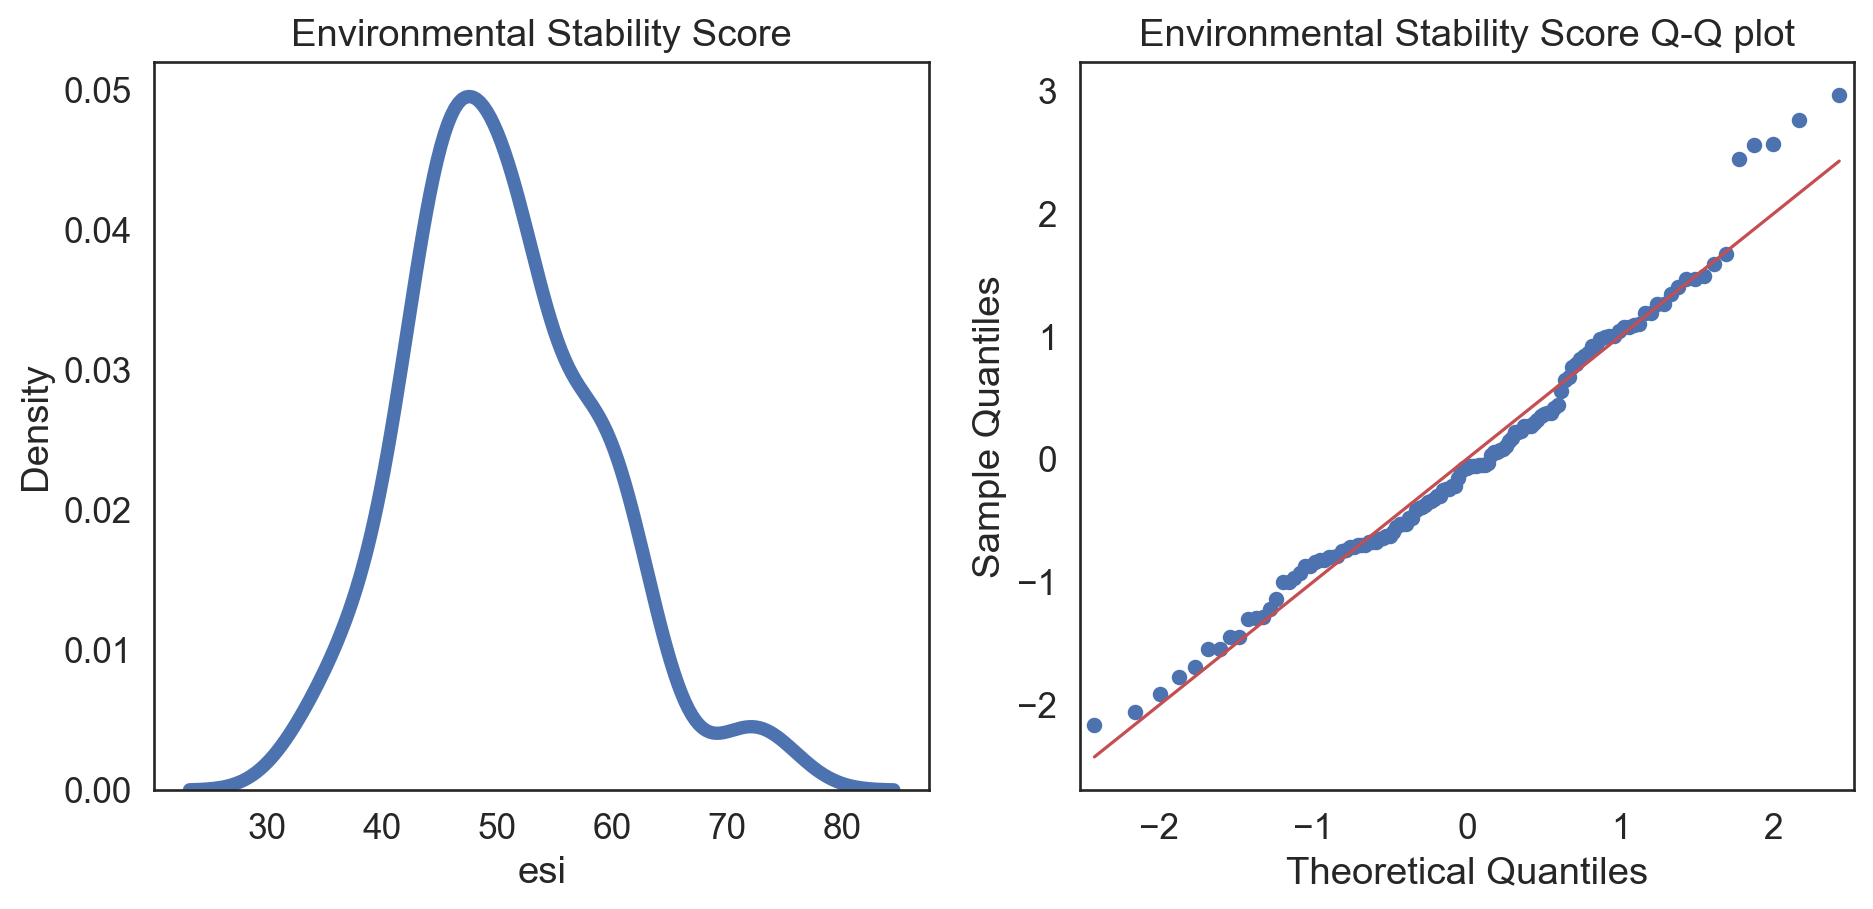

In [47]:
#| code-fold: true
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(data = esi_hfi_red, x = "esi", linewidth = 5, ax = ax1)
ax1.set_title('Environmental Stability Score')

sm.qqplot(esi_hfi_red['esi'], line = 's', ax = ax2, dist = stats.norm, fit = True)
ax2.set_title('Environmental Stability Score Q-Q plot')

plt.tight_layout()
plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/871381874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esi_hfi_red['pf_score_square'] = pow(esi_hfi_red.pf_score, 2)


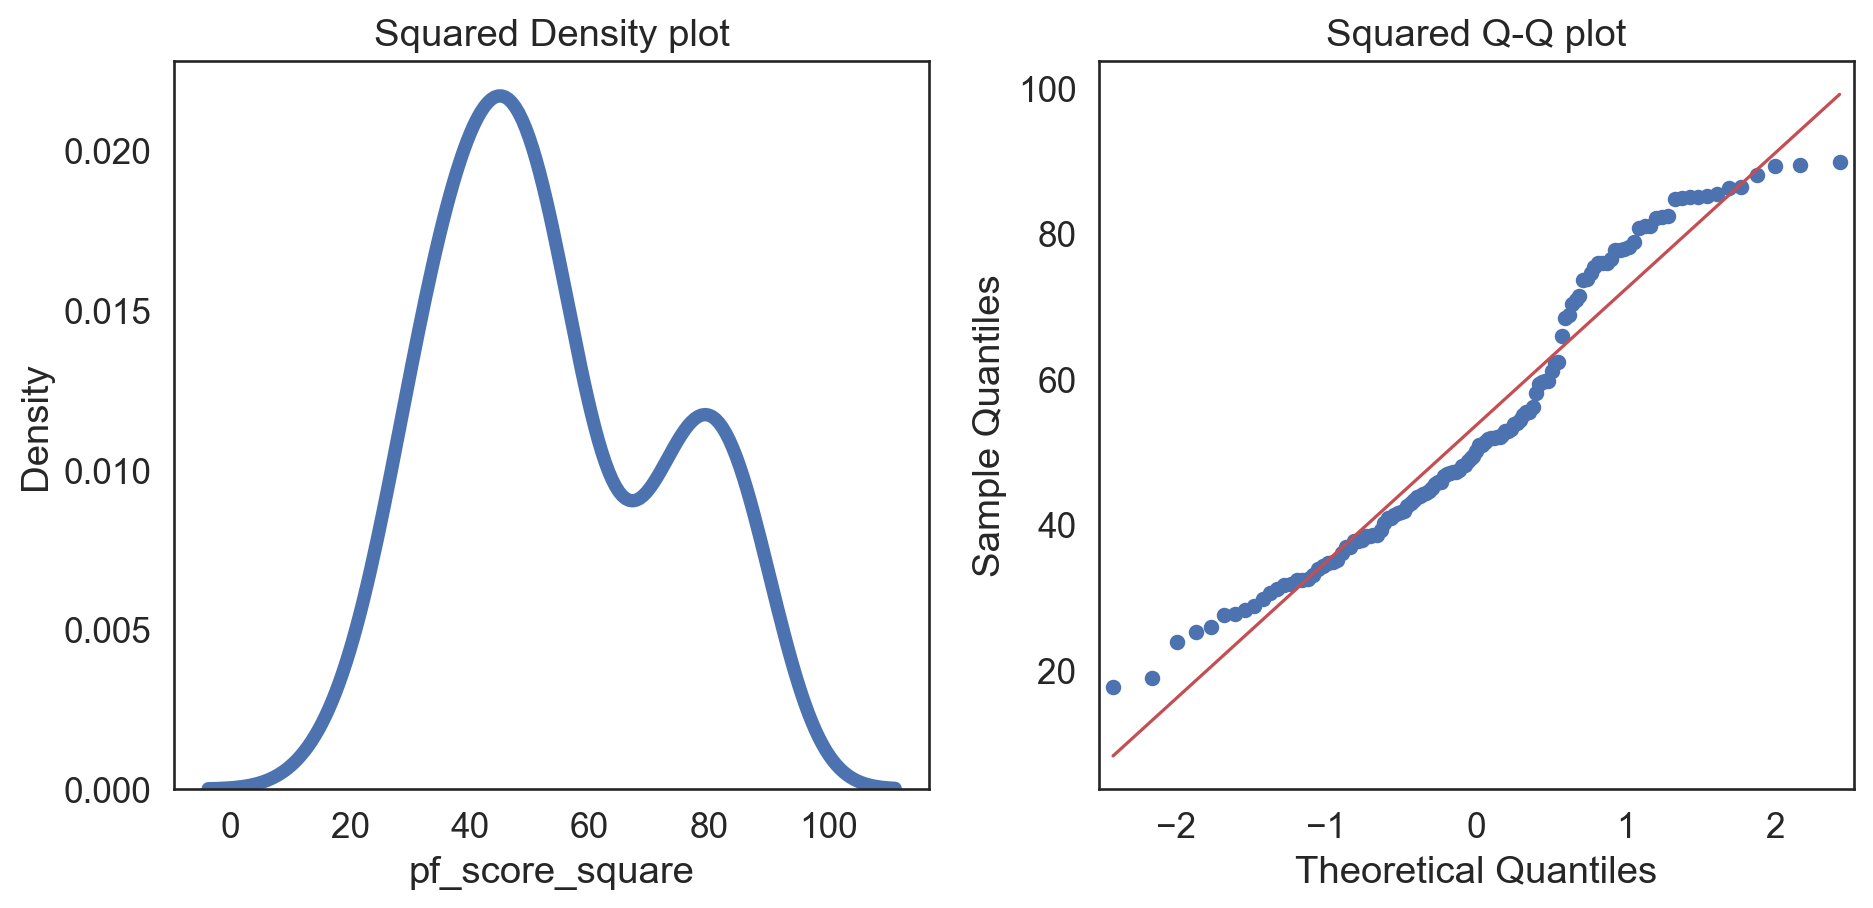

In [48]:
#| code-fold: true
esi_hfi_red['pf_score_square'] = pow(esi_hfi_red.pf_score, 2)

col = esi_hfi_red['pf_score_square']

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Squared Density plot')    

sm.qqplot(col, line = 's', ax = ax2)
ax2.set_title('Squared Q-Q plot')    
plt.tight_layout()
plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/1005012159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esi_hfi_red['esi_log'] = np.log(esi_hfi_red.esi + 1)


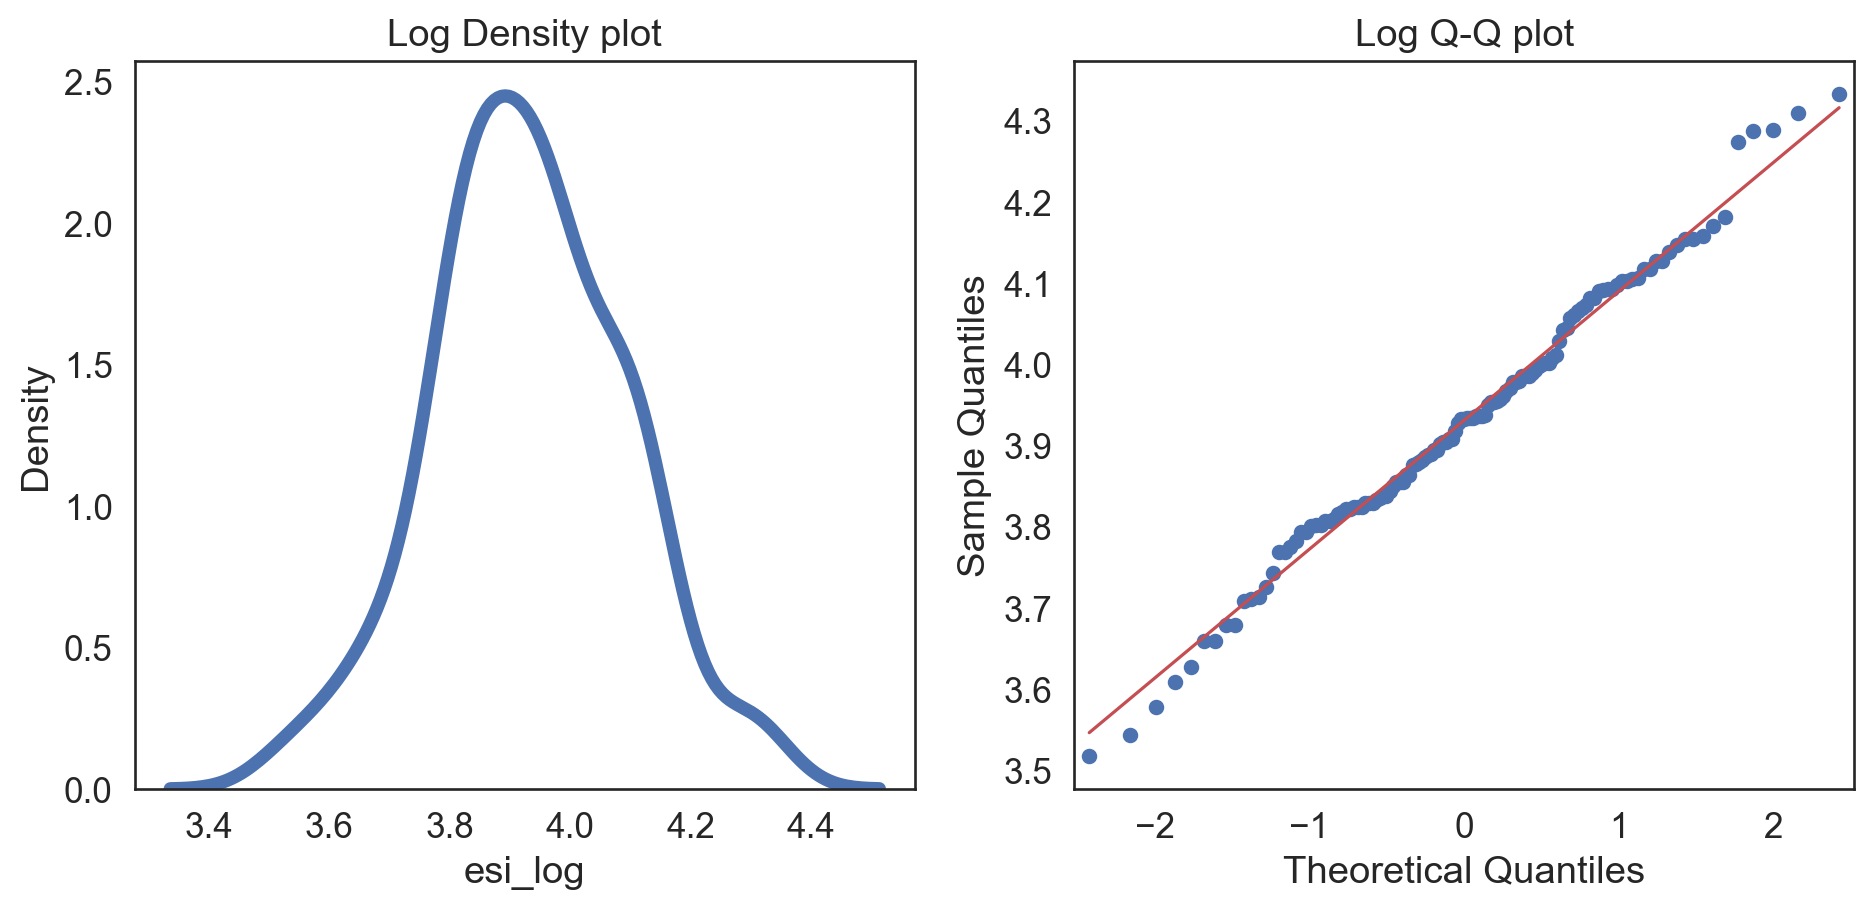

In [49]:
#| code-fold: true
esi_hfi_red['esi_log'] = np.log(esi_hfi_red.esi + 1)

col = esi_hfi_red['esi_log']

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Log Density plot')    

sm.qqplot(col, line = 's', ax = ax2)
ax2.set_title('Log Q-Q plot')    
plt.tight_layout()
plt.show()

In [50]:
scaler = StandardScaler()
esi_hfi_red[['esi_log', 'pf_score_square']] = scaler.fit_transform(esi_hfi_red[['esi_log', 'pf_score_square']])

esi_hfi_red.describe().round(3)

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44962/4268848855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esi_hfi_red[['esi_log', 'pf_score_square']] = scaler.fit_transform(esi_hfi_red[['esi_log', 'pf_score_square']])


esi  pf_score  pf_score_square  esi_log
count  129.000   129.000          129.000  129.000
mean    50.599     7.210            0.000    0.000
std      8.304     1.291            1.004    1.004
min     32.700     4.203           -1.916   -2.604
25%     44.800     6.207           -0.805   -0.671
50%     50.000     7.074           -0.191    0.006
75%     56.100     8.415            0.915    0.718
max     75.100     9.476            1.927    2.527

In [51]:
esi_hfi_num = esi_hfi_red.select_dtypes(include = 'number')

corr = esi_hfi_num.corr()
corr

esi  pf_score  pf_score_square   esi_log
esi              1.000000  0.574756         0.583615  0.993689
pf_score         0.574756  1.000000         0.995631  0.560831
pf_score_square  0.583615  0.995631         1.000000  0.566744
esi_log          0.993689  0.560831         0.566744  1.000000

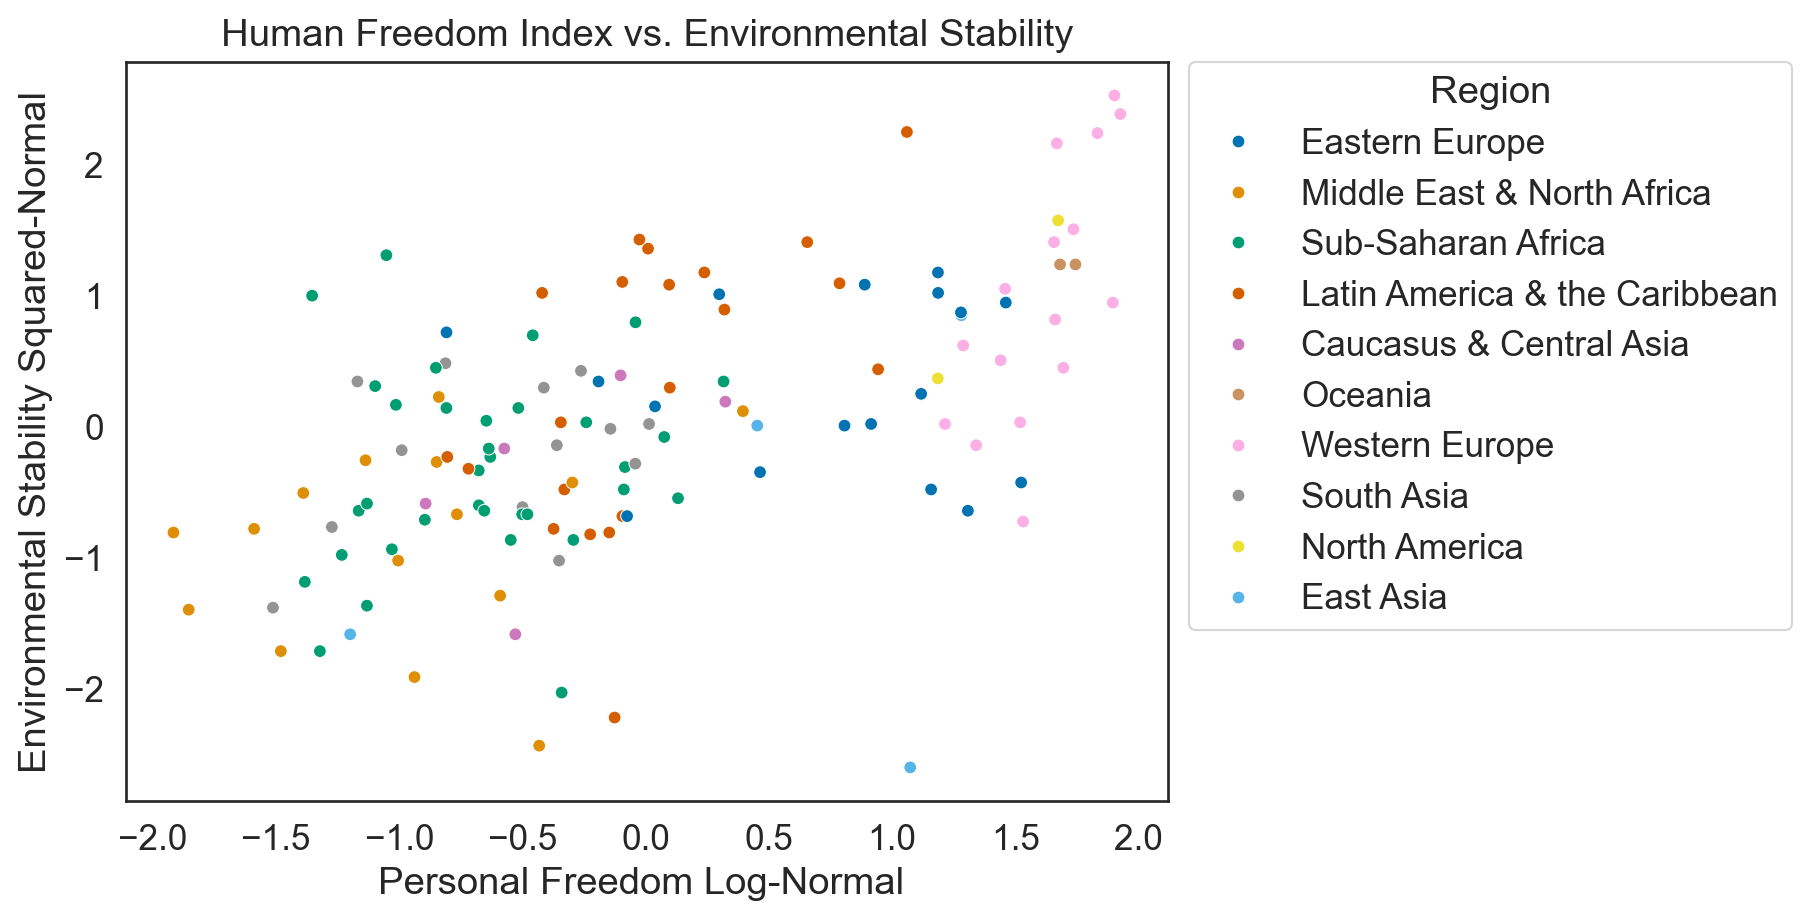

In [52]:
#| code-fold: true
plt.figure(figsize = (7, 5))
ax = sns.scatterplot(data = esi_hfi_red, x = "pf_score_square", y = "esi_log",
                hue = "region", palette = "colorblind")
ax.legend(title = "Region",
          bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
ax.set(xlabel = "Personal Freedom Log-Normal ")
ax.set(ylabel = "Environmental Stability Squared-Normal")
ax.set(title = "Human Freedom Index vs. Environmental Stability")
plt.show()

In [53]:
x = esi_hfi_red['pf_score_square']
y = esi_hfi_red['esi_log']
corr_coefficient, p_value = pearsonr(x, y)

print("Pearson correlation coefficient:", round(corr_coefficient, 3))
print("P-value:", round(p_value, 5))

Pearson correlation coefficient: 0.567
P-value: 0.0


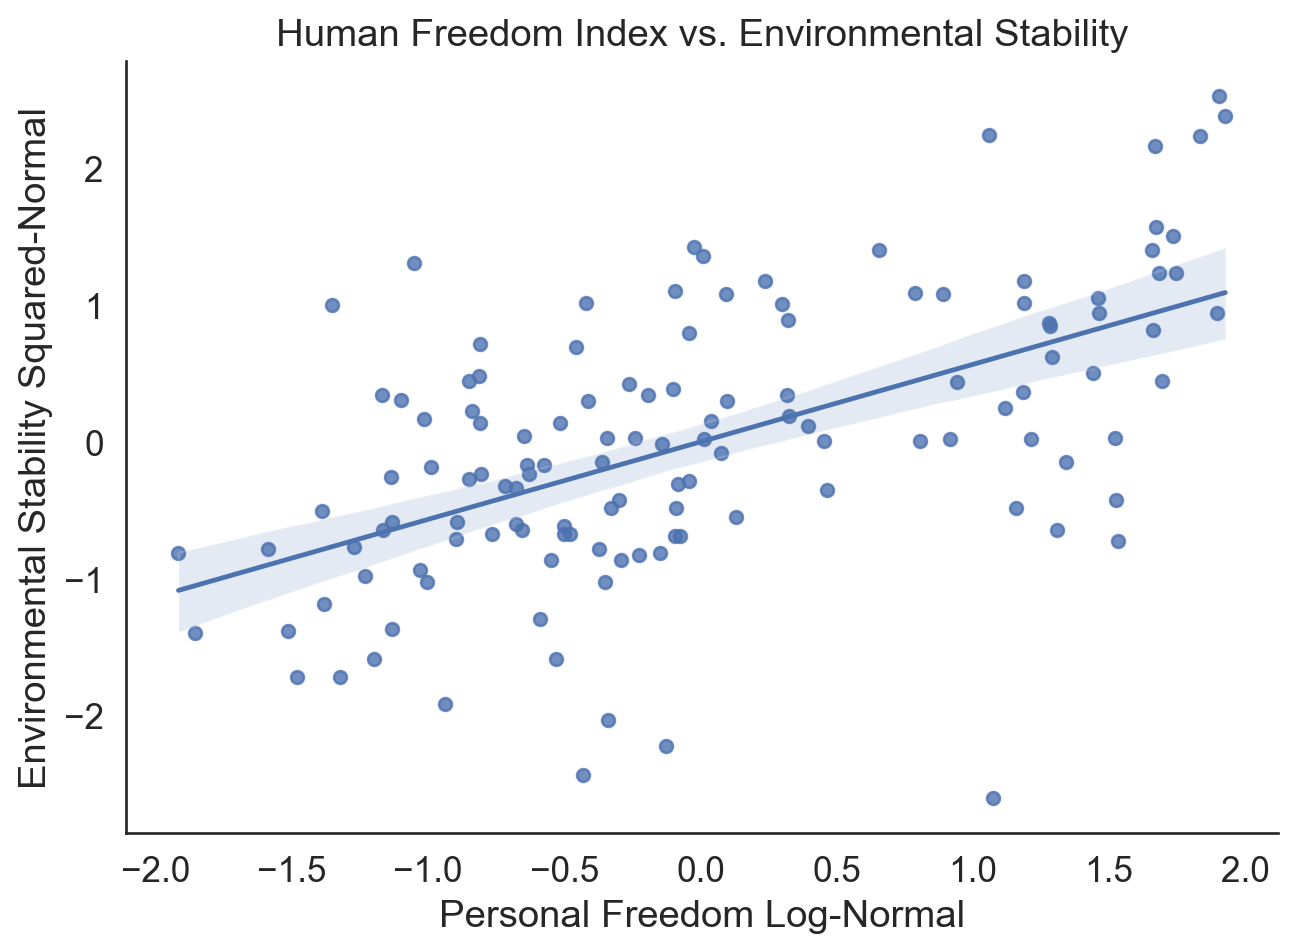

In [54]:
#| code-fold: true
sns.lmplot(data = esi_hfi_red, x = "pf_score_square", y = "esi_log", height = 5, aspect = 7/5)

plt.xlabel("Personal Freedom Log-Normal")
plt.ylabel("Environmental Stability Squared-Normal")
plt.title("Human Freedom Index vs. Environmental Stability")

plt.show()